In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import acquire
import prepare
import numpy as np
import env
import scipy.stats as stats

from pydataset import data
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

First in my analysis, using the order in which we did in class, I want to do some hypothesis testing by looking for relationship between variables in the dataset.

First I am going to aquire the dataset.

In [2]:
clean_telco = ct = prepare.prep_telco()

In [3]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype          
---  ------                                --------------  -----          
 0   customer_id                           7043 non-null   object         
 1   gender                                7043 non-null   object         
 2   senior_citizen                        7043 non-null   int64          
 3   partner                               7043 non-null   int64          
 4   dependents                            7043 non-null   int64          
 5   tenure                                7043 non-null   int64          
 6   phone_service                         7043 non-null   int64          
 7   multiple_lines                        7043 non-null   int64          
 8   online_security                       7043 non-null   int64          
 9   online_backup                         7043 non-null   int64    

In [4]:
ct.columns.to_list()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'signup_date',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'time_with_telco']

In [5]:
ct['churn_month'].value_counts()

0                      5174
2022-01-31 00:00:00    1869
Name: churn_month, dtype: int64

In [6]:
unclean_telco = ut = acquire.get_telco_data()

In [7]:
ut.columns.to_list()

['customer_id',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'signup_date']

In [8]:
# I am looking at the dtypes to see initally which features I can graph categorcially
# and which I can graph continuously
ut.dtypes

customer_id                  object
payment_type_id               int64
internet_service_type_id      int64
contract_type_id              int64
gender                       object
senior_citizen                int64
partner                      object
dependents                   object
tenure                        int64
phone_service                object
multiple_lines               object
online_security              object
online_backup                object
device_protection            object
tech_support                 object
streaming_tv                 object
streaming_movies             object
paperless_billing            object
monthly_charges             float64
total_charges                object
churn                        object
contract_type                object
internet_service_type        object
payment_type                 object
churn_month                  object
signup_date                  object
dtype: object

In [9]:
ut.head(10)

,customer_id,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,signup_date
0,0002-ORFBO,2,1,2,Female,0,Yes,Yes,9,Yes,...,No,Yes,65.60,593.3,No,One year,DSL,Mailed check,NaN,2021-04-21 18:07:34
1,0003-MKNFE,2,1,1,Male,0,No,No,9,Yes,...,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check,NaN,2021-04-21 18:07:34
2,0004-TLHLJ,1,2,1,Male,0,No,No,4,Yes,...,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2021-09-21 18:07:34
3,0011-IGKFF,1,2,1,Male,1,Yes,No,13,Yes,...,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2020-12-21 18:07:34
4,0013-EXCHZ,2,2,1,Female,1,Yes,No,3,Yes,...,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check,2022-01-31,2021-10-21 18:07:34
5,0013-MHZWF,4,1,1,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.40,571.45,No,Month-to-month,DSL,Credit card (automatic),NaN,2021-04-21 18:07:34
6,0013-SMEOE,3,2,3,Female,1,Yes,No,71,Yes,...,Yes,Yes,109.70,7904.25,No,Two year,Fiber optic,Bank transfer (automatic),NaN,2016-02-21 18:07:34
7,0014-BMAQU,4,2,3,Male,0,Yes,No,63,Yes,...,No,Yes,84.65,5377.8,No,Two year,Fiber optic,Credit card (automatic),NaN,2016-10-21 18:07:34
8,0015-UOCOJ,1,1,1,Female,1,No,No,7,Yes,...,No,Yes,48.20,340.35,No,Month-to-month,DSL,Electronic check,NaN,2021-06-21 18:07:34
9,0016-QLJIS,2,1,3,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check,NaN,2016-08-21 18:07:34


In [10]:
# in order to make some initial visualizations, I will put my unclean data into 
# columns to then make some graphs
cat_cols , num_cols = [], []
for col in ut.columns:
    if ut[col].dtype == "o":
        cat_cols.append(col)
    else:
        if ut[col].nunique() < 10:
            cat_cols.append(col)
        else: num_cols.append(col)

In [11]:
cat_cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

In [12]:
num_cols

['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'signup_date']

In [13]:
# Im going to take out some unnecessary columns from each of my new columns
cat_cols

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

In [14]:
cat_cols.remove('payment_type_id')
cat_cols.remove('internet_service_type_id')
cat_cols.remove('contract_type_id')
num_cols.remove('customer_id')

In [15]:
# I removed the redundant columns and now I have desctiptive string columns or numeric
# columns 
ut[cat_cols].dtypes

gender                   object
senior_citizen            int64
partner                  object
dependents               object
phone_service            object
multiple_lines           object
online_security          object
online_backup            object
device_protection        object
tech_support             object
streaming_tv             object
streaming_movies         object
paperless_billing        object
churn                    object
contract_type            object
internet_service_type    object
payment_type             object
churn_month              object
dtype: object

In [16]:
ut[num_cols].dtypes

tenure               int64
monthly_charges    float64
total_charges       object
signup_date         object
dtype: object

In [17]:
# Great! Now we will make some graphs

In [18]:
explore_cols = cat_cols + num_cols

In [19]:
# we will make a for loop that will make our graphs
ut.head()

,customer_id,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,churn_month,signup_date
0,0002-ORFBO,2,1,2,Female,0,Yes,Yes,9,Yes,...,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,NaN,2021-04-21 18:07:34
1,0003-MKNFE,2,1,1,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,NaN,2021-04-21 18:07:34
2,0004-TLHLJ,1,2,1,Male,0,No,No,4,Yes,...,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2021-09-21 18:07:34
3,0011-IGKFF,1,2,1,Male,1,Yes,No,13,Yes,...,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,2022-01-31,2020-12-21 18:07:34
4,0013-EXCHZ,2,2,1,Female,1,Yes,No,3,Yes,...,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check,2022-01-31,2021-10-21 18:07:34


Univariate assessment of feature gender:


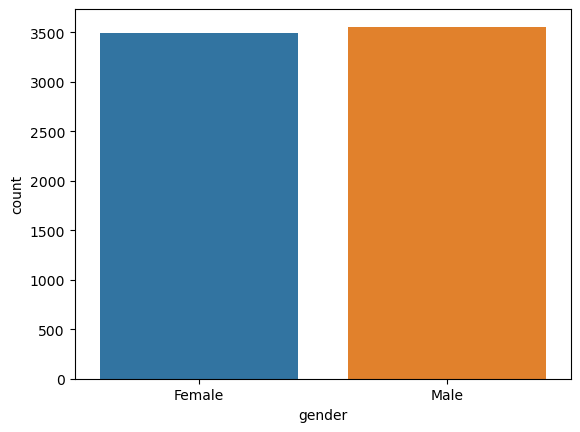

_____________________________________________________
_____________________________________________________

Univariate assessment of feature senior_citizen:


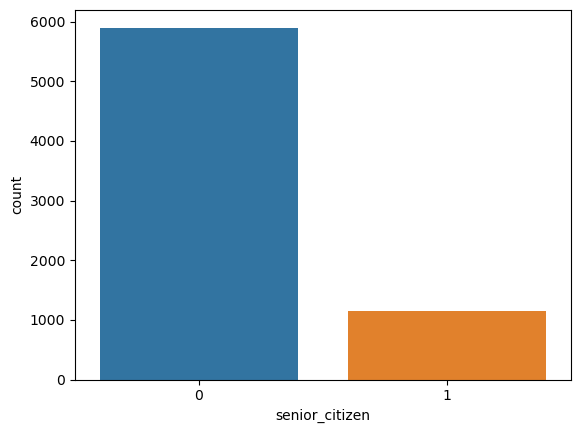

_____________________________________________________
_____________________________________________________

Univariate assessment of feature partner:


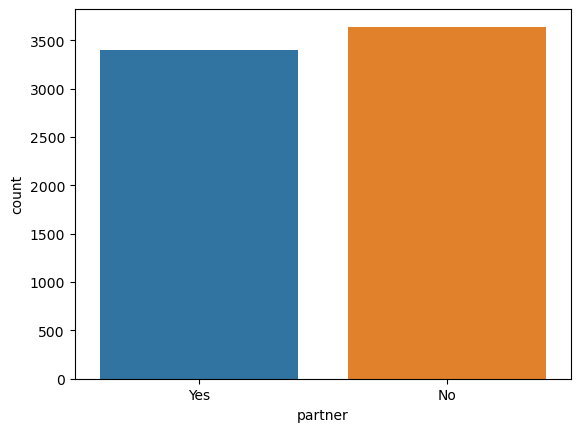

_____________________________________________________
_____________________________________________________

Univariate assessment of feature dependents:


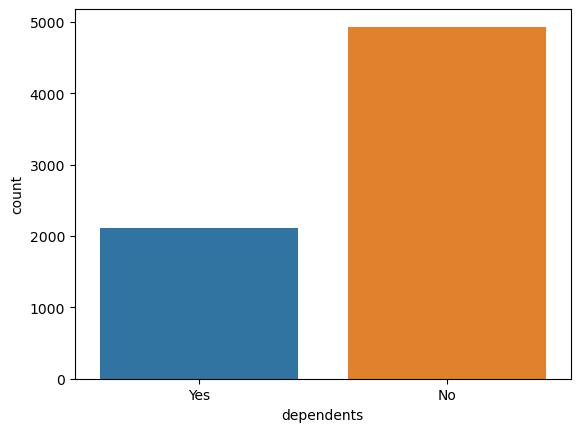

_____________________________________________________
_____________________________________________________

Univariate assessment of feature phone_service:


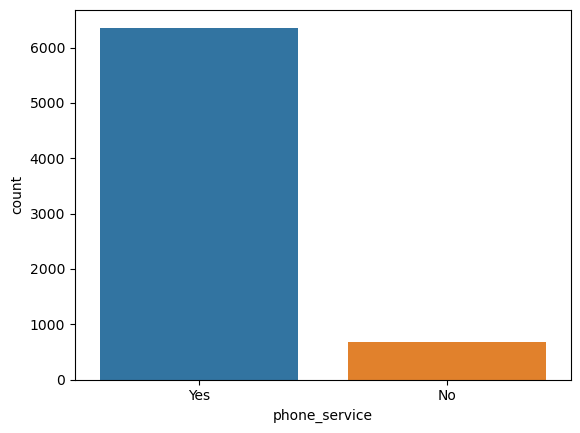

_____________________________________________________
_____________________________________________________

Univariate assessment of feature multiple_lines:


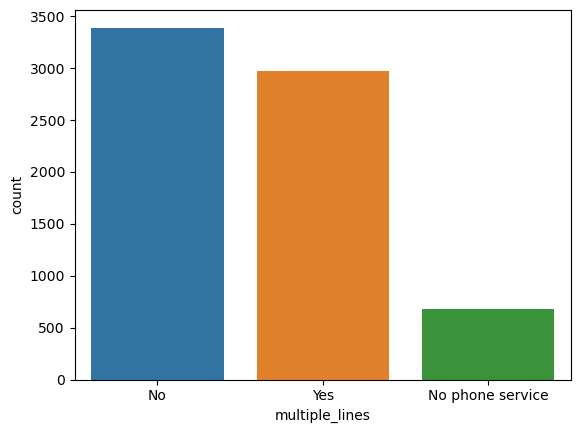

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_security:


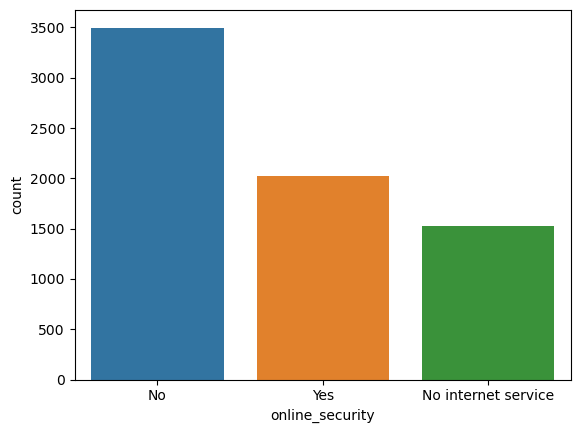

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_backup:


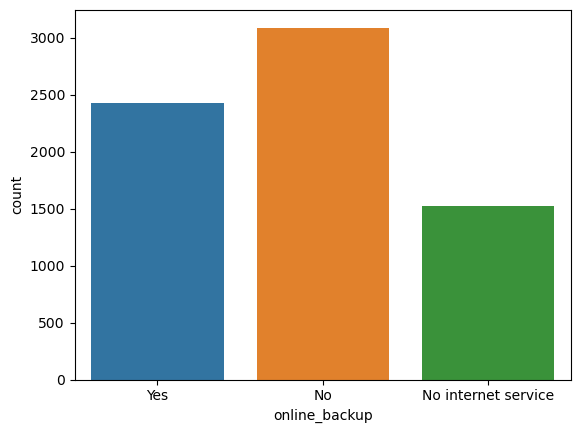

_____________________________________________________
_____________________________________________________

Univariate assessment of feature device_protection:


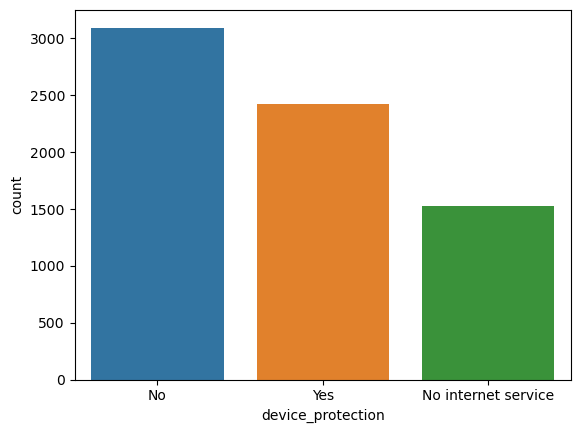

_____________________________________________________
_____________________________________________________

Univariate assessment of feature tech_support:


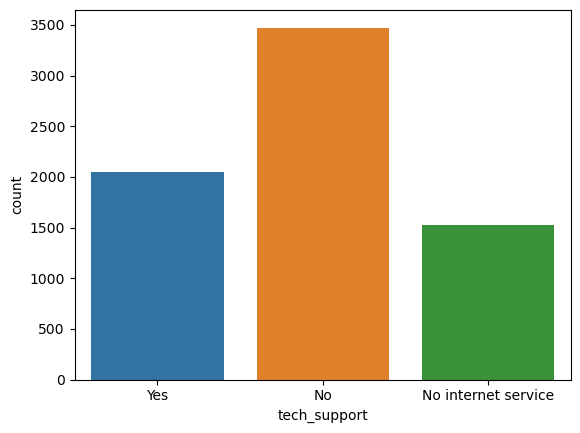

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_tv:


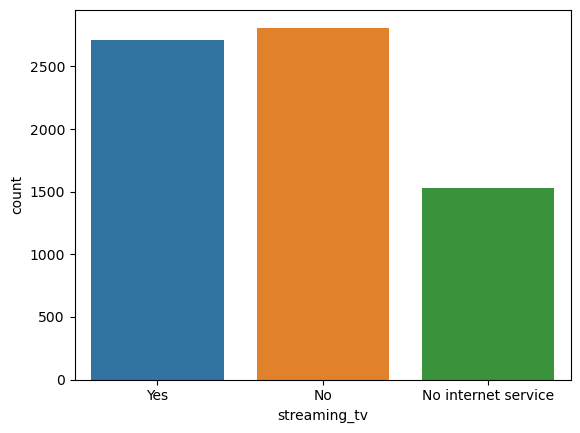

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_movies:


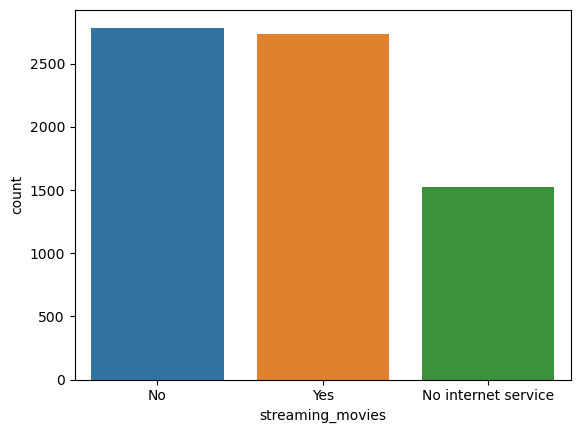

_____________________________________________________
_____________________________________________________

Univariate assessment of feature paperless_billing:


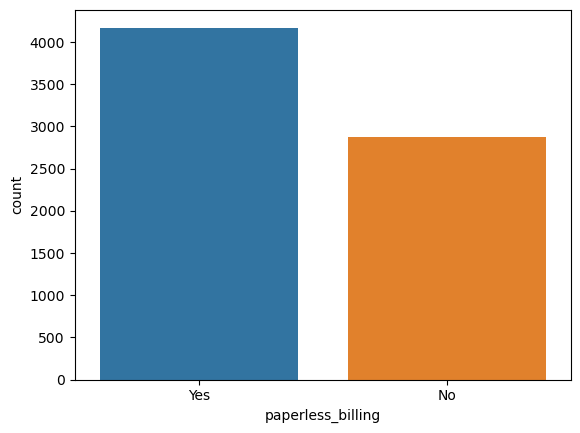

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn:


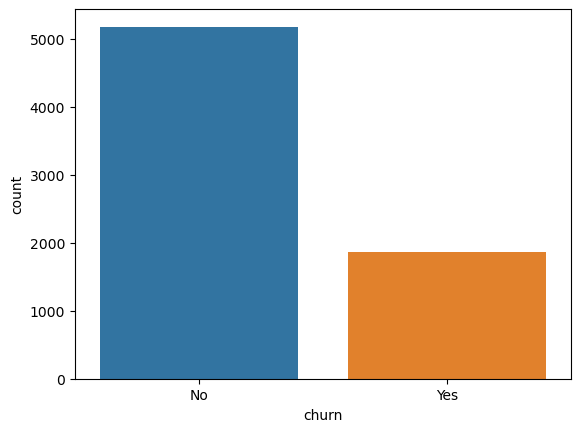

_____________________________________________________
_____________________________________________________

Univariate assessment of feature contract_type:


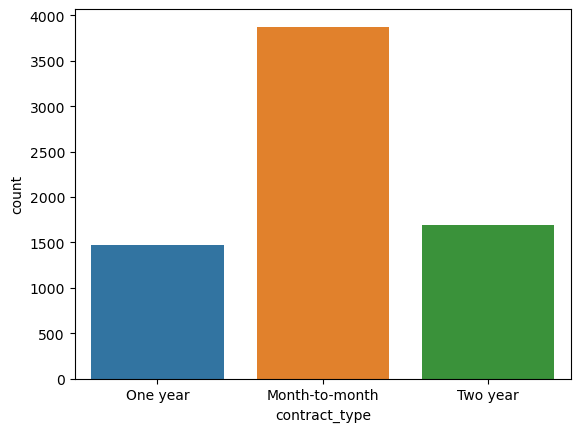

_____________________________________________________
_____________________________________________________

Univariate assessment of feature internet_service_type:


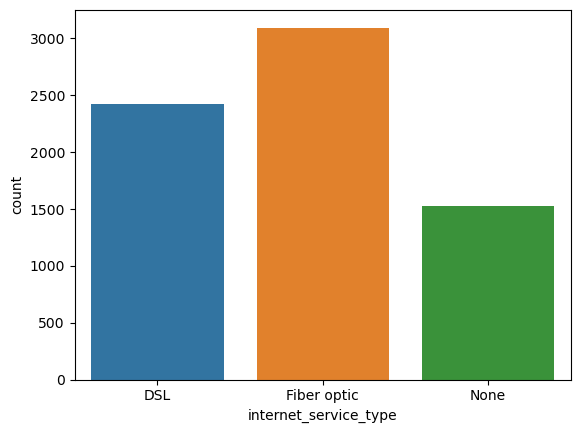

_____________________________________________________
_____________________________________________________

Univariate assessment of feature payment_type:


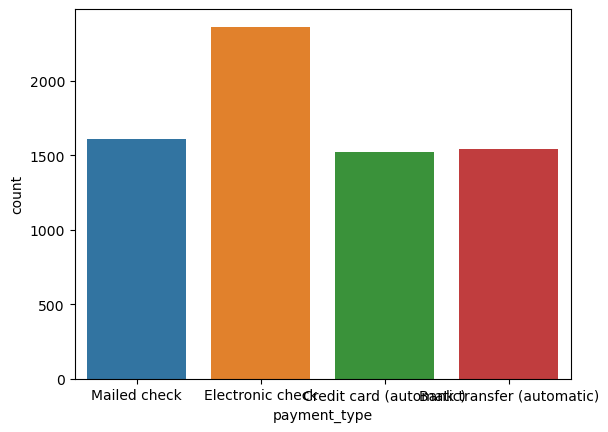

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn_month:


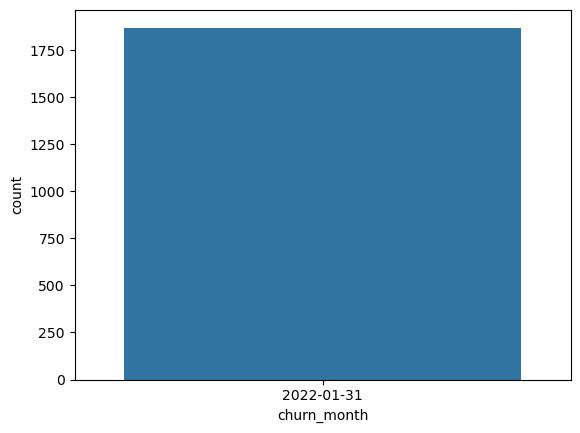

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature tenure: 


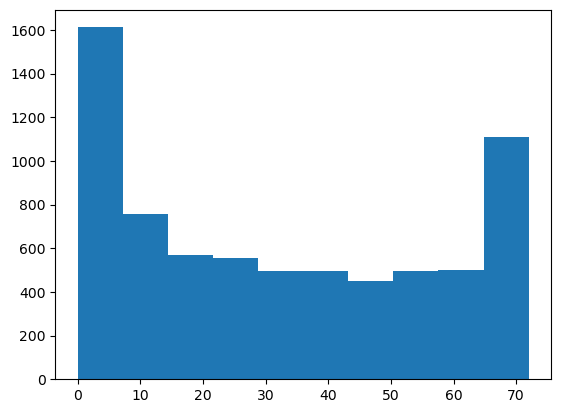

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature monthly_charges: 


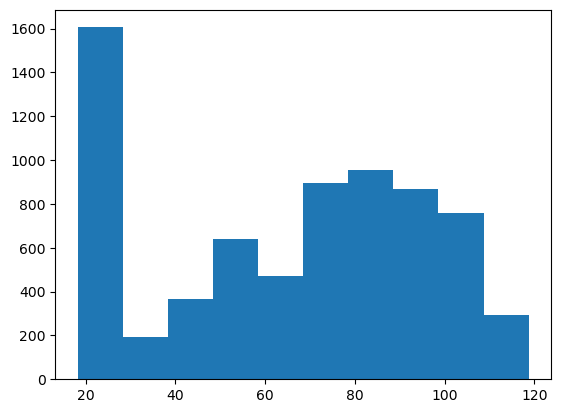

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature total_charges: 


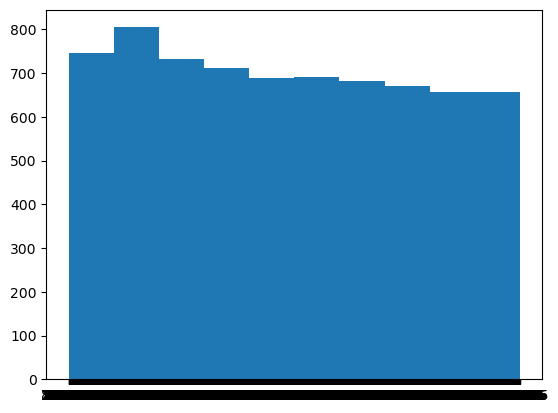

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature signup_date: 


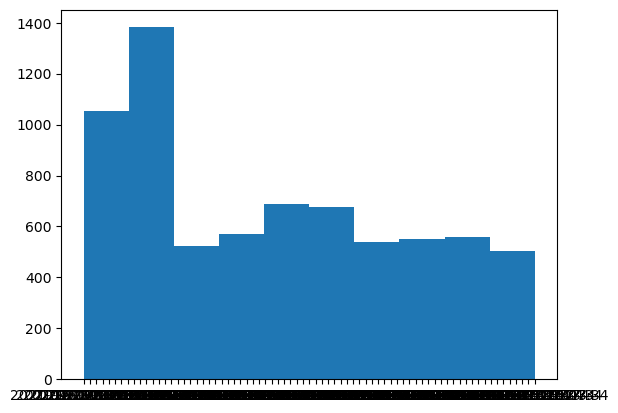

_____________________________________________________
_____________________________________________________



In [20]:
for col in explore_cols:
    if col in cat_cols:
        print(f'Univariate assessment of feature {col}:')
        sns.countplot(data=ut, x=col)
        plt.show()
#         print(
#             pd.concat(ut[col].value_counts(),
#                      ut[col].value_counts(normalize=True),
#                      axis=1))
    if col in num_cols:
        print(f'Univariate feature analysis of feature {col}: ')
        plt.hist(ut[col])
        plt.show()
        ut[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

In [21]:
num_cols

['tenure', 'monthly_charges', 'total_charges', 'signup_date']

In [22]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

Now lets look at some univariate visulizations with our clean dataset

In [23]:
# in order to make some initial visualizations, I will put my unclean data into 
# columns to then make some graphs
cat_cols , num_cols = [], []
for col in ct.columns:
    if ct[col].dtype == "o":
        cat_cols.append(col)
    else:
        if ct[col].nunique() < 10:
            cat_cols.append(col)
        else: num_cols.append(col)


In [24]:
# Lets look at our columns
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']

In [25]:
num_cols

['customer_id',
 'tenure',
 'monthly_charges',
 'total_charges',
 'signup_date',
 'time_with_telco']

In [26]:
# for graphoing purposes, Im going to remove the one_hot encoded variables which will
# cause breakage in my code as seen above
cat_cols.remove('gender_Male')
cat_cols.remove('contract_type_One year')
cat_cols.remove('contract_type_Two year')
cat_cols.remove('internet_service_type_Fiber optic')
cat_cols.remove('internet_service_type_None')
cat_cols.remove('payment_type_Credit card (automatic)')
cat_cols.remove('payment_type_Electronic check')
cat_cols.remove('payment_type_Mailed check')

In [27]:
explore_cols = cat_cols + num_cols

In [28]:
cat_cols

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'churn_month']

Univariate assessment of feature gender:


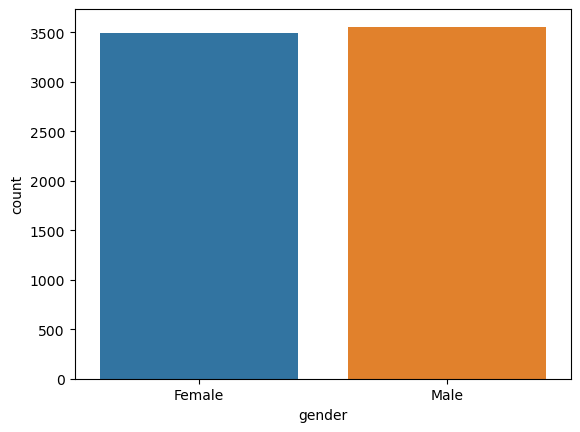

_____________________________________________________
_____________________________________________________

Univariate assessment of feature senior_citizen:


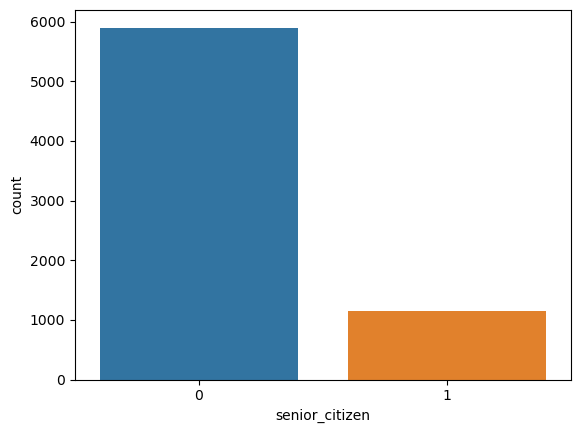

_____________________________________________________
_____________________________________________________

Univariate assessment of feature partner:


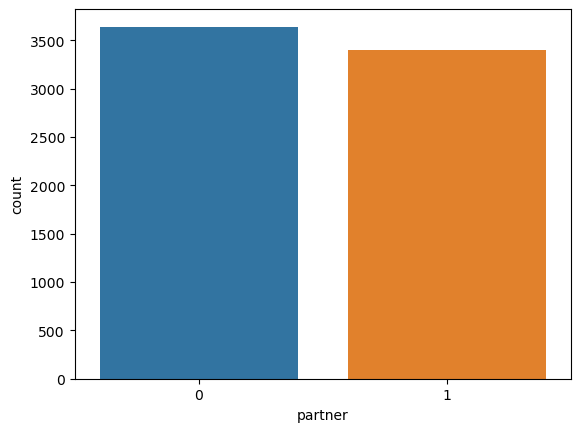

_____________________________________________________
_____________________________________________________

Univariate assessment of feature dependents:


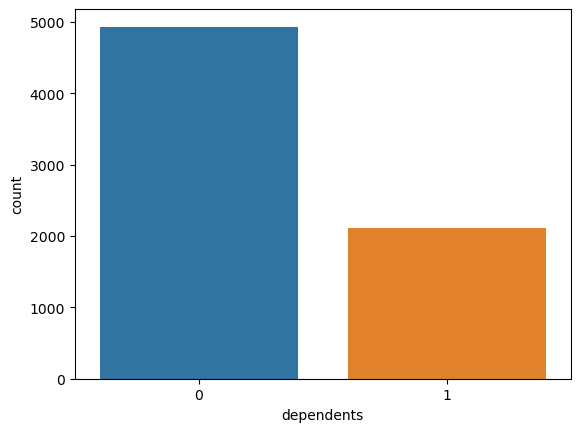

_____________________________________________________
_____________________________________________________

Univariate assessment of feature phone_service:


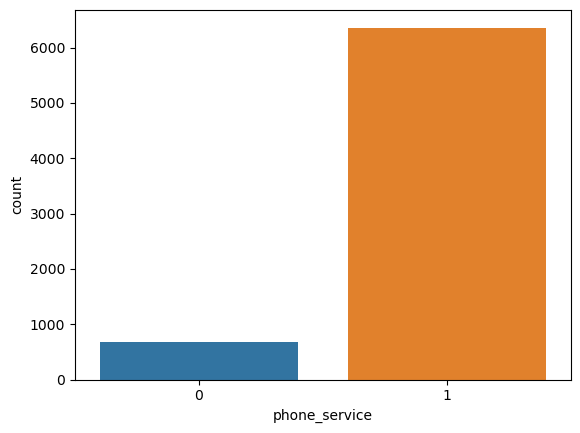

_____________________________________________________
_____________________________________________________

Univariate assessment of feature multiple_lines:


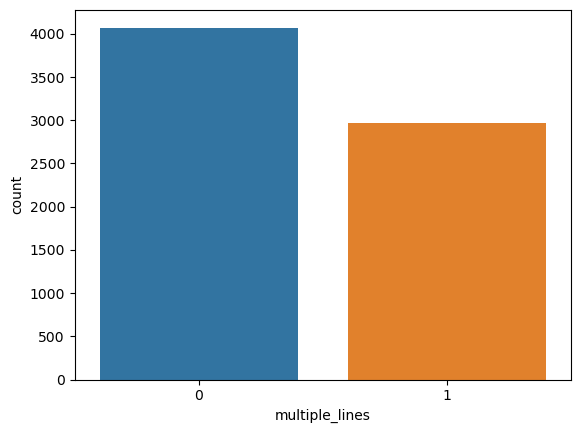

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_security:


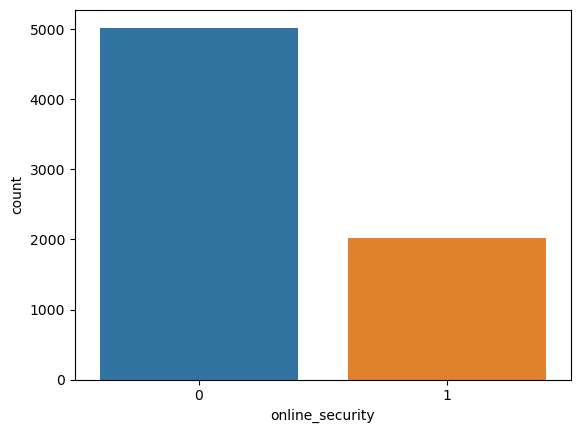

_____________________________________________________
_____________________________________________________

Univariate assessment of feature online_backup:


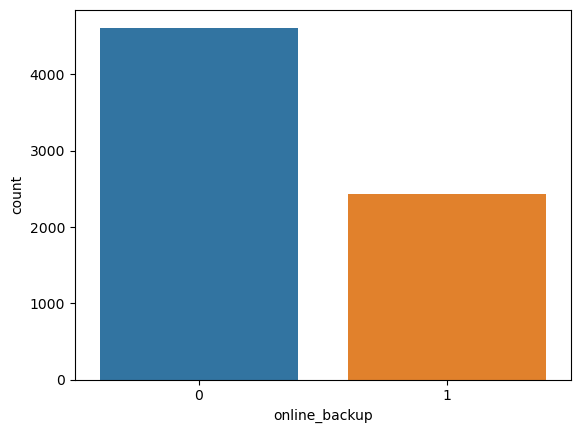

_____________________________________________________
_____________________________________________________

Univariate assessment of feature device_protection:


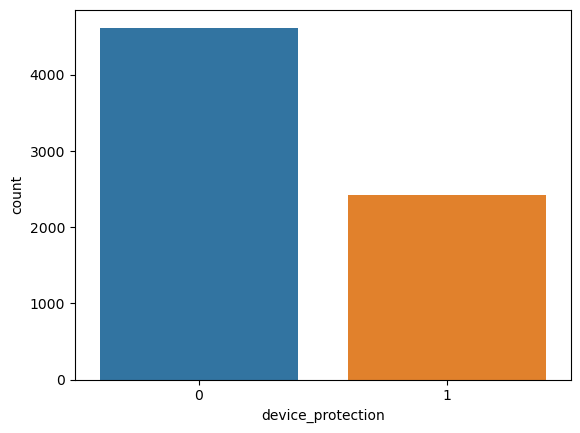

_____________________________________________________
_____________________________________________________

Univariate assessment of feature tech_support:


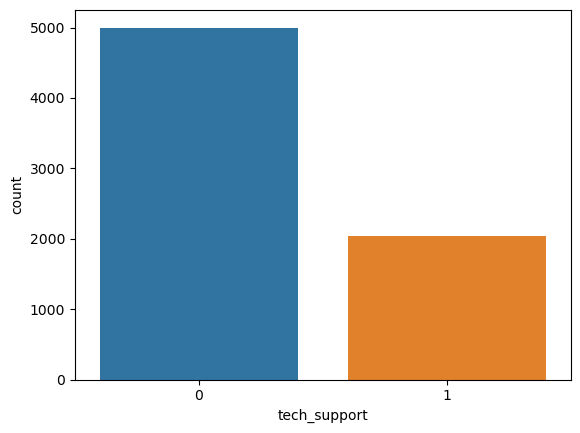

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_tv:


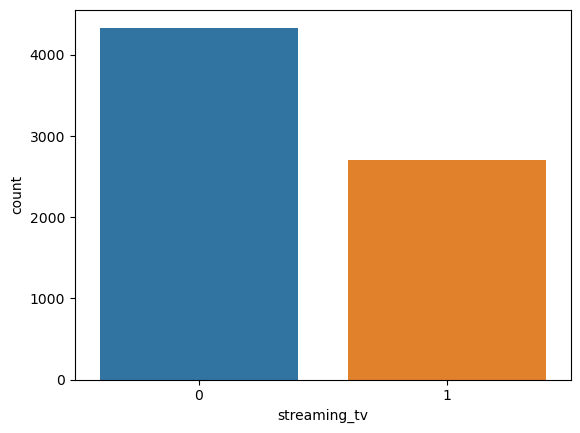

_____________________________________________________
_____________________________________________________

Univariate assessment of feature streaming_movies:


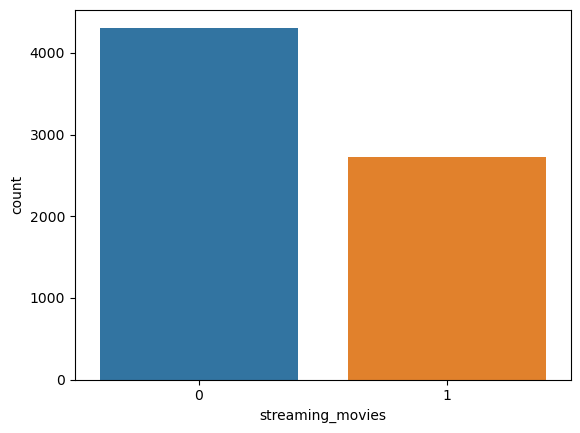

_____________________________________________________
_____________________________________________________

Univariate assessment of feature paperless_billing:


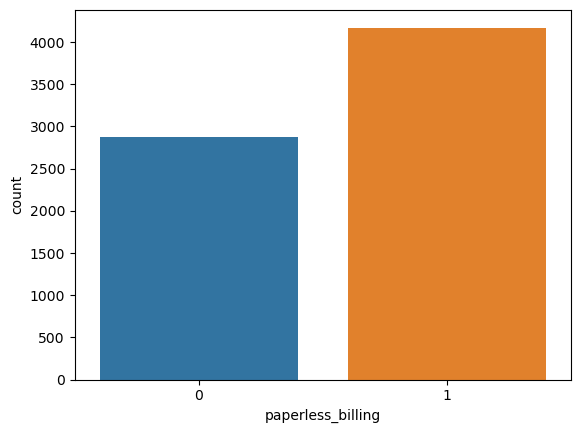

_____________________________________________________
_____________________________________________________

Univariate assessment of feature churn:


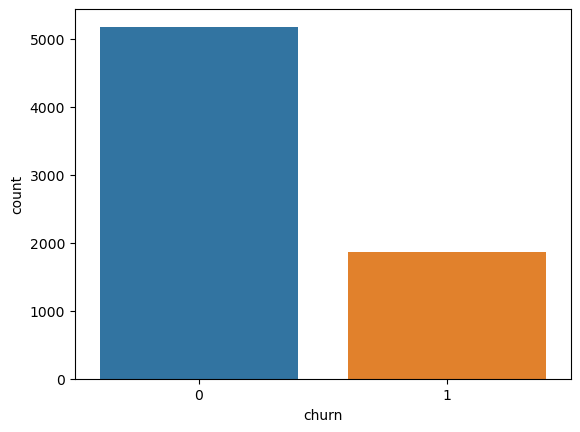

_____________________________________________________
_____________________________________________________

Univariate assessment of feature contract_type:


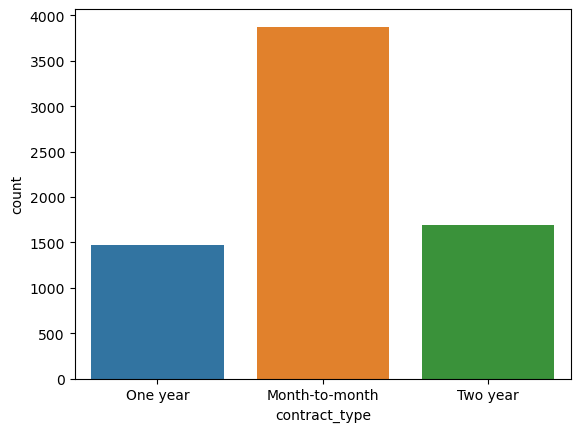

_____________________________________________________
_____________________________________________________

Univariate assessment of feature internet_service_type:


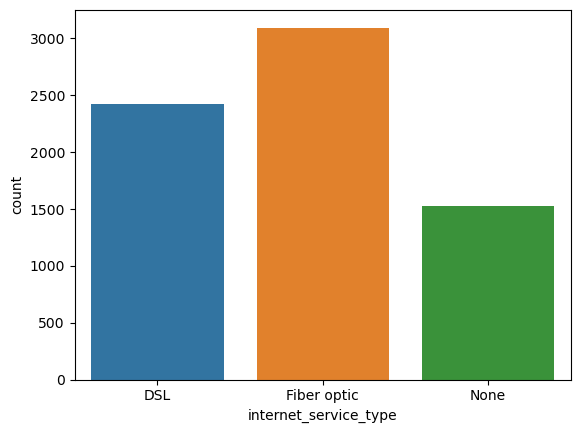

_____________________________________________________
_____________________________________________________

Univariate assessment of feature payment_type:


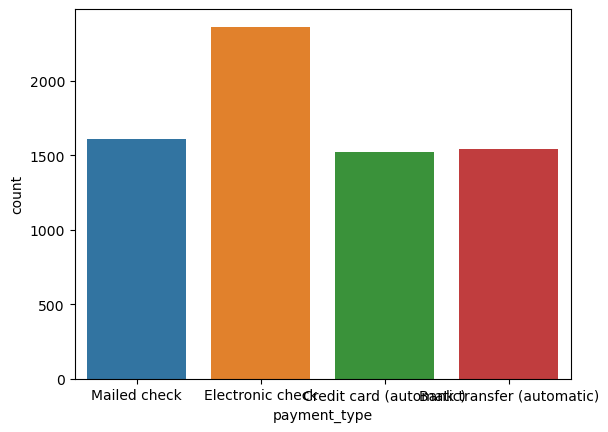

_____________________________________________________
_____________________________________________________

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature customer_id: 


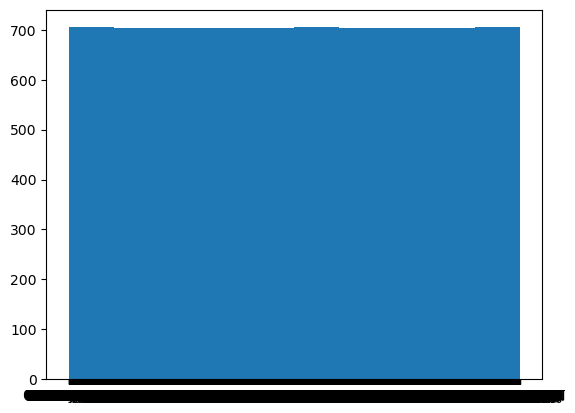

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature tenure: 


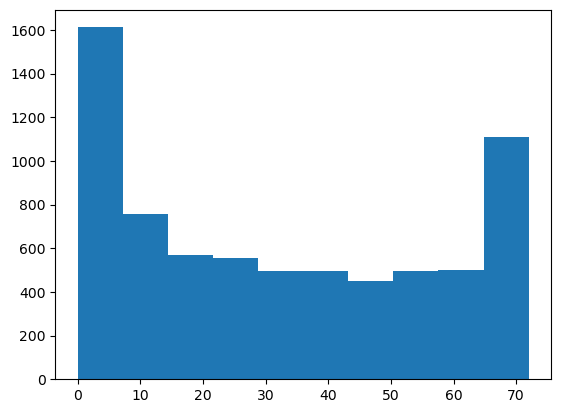

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature monthly_charges: 


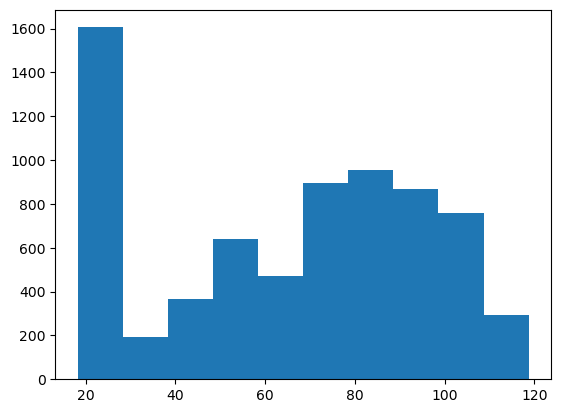

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature total_charges: 


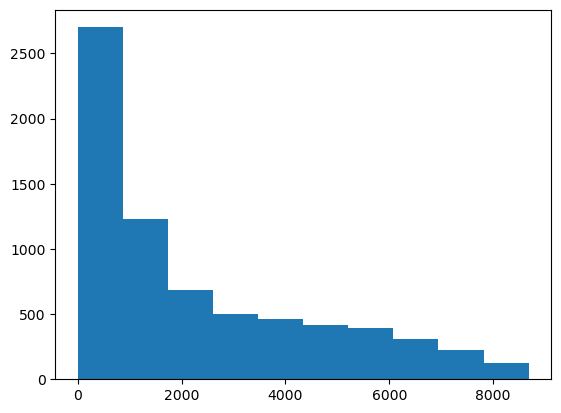

_____________________________________________________
_____________________________________________________

Univariate feature analysis of feature signup_date: 


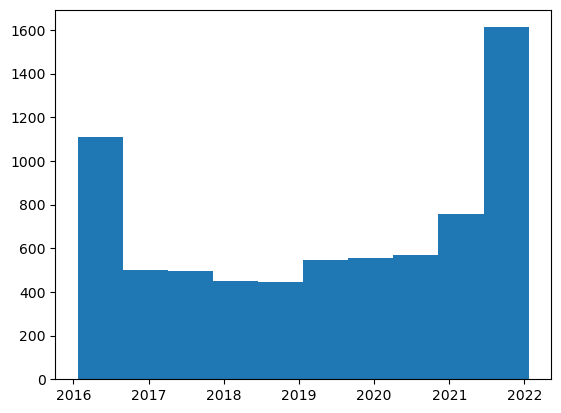

_____________________________________________________
_____________________________________________________

_____________________________________________________
_____________________________________________________



In [29]:
for col in explore_cols:
    if col in cat_cols:
        if col != 'churn_month':
            print(f'Univariate assessment of feature {col}:')
            sns.countplot(data=ct, x=col)
            plt.show()
#         
    if col in num_cols:
        if col != 'time_with_telco':
            print(f'Univariate feature analysis of feature {col}: ')
            plt.hist(ct[col])
            plt.show()
            ut[col].describe()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

### Takeways from the univariate visualizations 

- gender:
    the ratio of male to female looks pretty even
- senior citizen:
    there are far more non-senior citizens than there are senior citizens
- partner: there is no significant difference in the amount of customers who are partners vs not
- dependents: there are about half the number of people with dependents vs those without 
- phone service: far more people pay for phone service than those who don't
- multiple lines: there are a little bit more customers who do not have multiple lines than those who do
- online security: there are less than half of people who do pay for online security vs those who do not
- online backup: there are about 50% less of people who pay for online backup than those who do not
- device protection: there are about 50% less of people who pay for device protection than those who do not
- tech support: approximately 2/3 more people do not pay for tech support than those who do
- streaming tv: more people do not have tv streaming than those who do
- streaming movies: more people do not have movie streaming than those who do
- paperless billing: more people have paperless billing than than those who have paper billing
- ** churn: we have more customers who have not churned than those who have churned ( about a 1 to 3 ratio)
- contract type:
     - most people have a month to month contract (about 3:1 when compared to either one year or two year)
- internet service type: 
    - most people have fiber optic, but a comparable amount of people have DSL.
    - about half the people who have fiber optic do not have any internet service 
- payment type: 
    - most people use electronic checks
    - there is a pretty uniform distribution of those who use auto, mailed check, and electronic checks
- tenure:
    - the spikes we see are those who are new customers/customers who only stayed with us for a short amount of time OR customers who have been with us for years
    - its a pretty uniform distribution for the tenure time in between 5 and 65 months
    - mean of about 30
- monthly charges:
    - there is a spike of people who pay the minimum, but the majority of people pay somewhere around the mean of ~70
- total charges:
    - the distribution is skewed to the right
    - most people pay somewhere between $40 and $80/mo

According to Reviews.org (https://www.reviews.org/internet-service/cost-of-internet-streaming-and-cell-phone-bills/): 

Average American monthly telecommunications costs:

    Internet services: $57.25 per month
Cell phone plans: $50.17 per month
    Streaming services: $39.96 per month
Total: $147.38 per month

In [30]:
round(ct.monthly_charges.mean(), 2)
# compared to the monthly average, telco is pretty affordable...

64.76

So the metrics observed by Reviews.org are:

    - streaming
    - mobile plans
    - internet

So lets look at what people who pay for these services pay per month

In [31]:
filtered_ct = ct[['internet_service_type', 'phone_service', 'streaming_tv', 'streaming_movies', 'churn', 'monthly_charges', 'tenure', 'total_charges']]

In [32]:
# lets make some masks

In [33]:
# Mask: lets see who does pay for phone_service, internet, streaming tv and movies
all_services = filtered_ct[(filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1)]
all_services

,internet_service_type,phone_service,streaming_tv,streaming_movies,churn,monthly_charges,tenure,total_charges
3,Fiber optic,1,1,1,1,98.00,13,1237.85
5,DSL,1,1,1,0,69.40,9,571.45
6,Fiber optic,1,1,1,0,109.70,71,7904.25
9,DSL,1,1,1,0,90.45,65,5957.90
11,Fiber optic,1,1,1,0,116.80,72,8456.75
...,...,...,...,...,...,...,...,...
7019,Fiber optic,1,1,1,0,106.70,71,7382.25
7020,Fiber optic,1,1,1,1,96.80,21,2030.30
7027,Fiber optic,1,1,1,0,108.90,34,3625.20
7031,Fiber optic,1,1,1,0,99.15,64,6171.20


In [34]:
len(filtered_ct)

7043

So out of 7043, only 1740 pay for internet, phone, movie streaming, and phone streaming

In [35]:
all_services.monthly_charges.mean()

97.61183908045972

In [36]:
147.38 - all_services.monthly_charges.mean()

49.76816091954028

In [37]:
churned_all_services = all_services.churn.value_counts()[1]
non_churned_all_services = all_services.churn.value_counts()[0]
print(f'Of customers who pay for phone, internet, and streaming services, {non_churned_all_services} customers have stayed with the company, and {churned_all_services} customers have left the company.')

Of customers who pay for phone, internet, and streaming services, 1212 customers have stayed with the company, and 528 customers have left the company.


Reminder: accoring to Reviews.org, the average American pays a total of $$147.38 per month so our customers who pay for internet, phone, and streaming services are paying $97.61 per month, $49.77 less for the same services. 

This leads me to believe that what we are charging for these services is not a contributing factor to churn, but lets look at some bivariate and multivariate analysis.

In [38]:
num_cols

['customer_id',
 'tenure',
 'monthly_charges',
 'total_charges',
 'signup_date',
 'time_with_telco']

Bivariate assessment of feature gender:


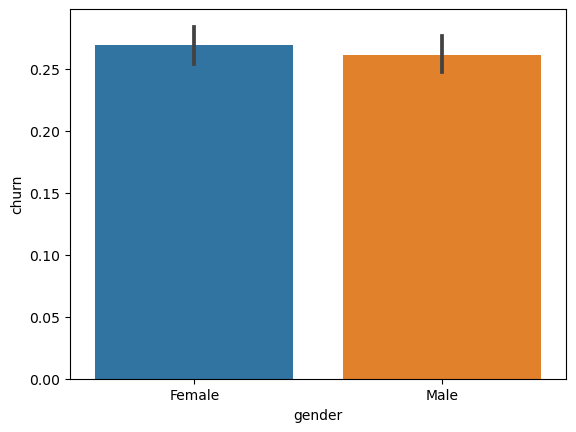

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature senior_citizen:


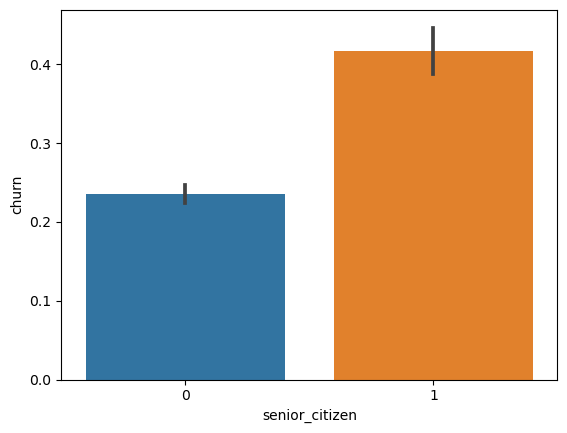

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature partner:


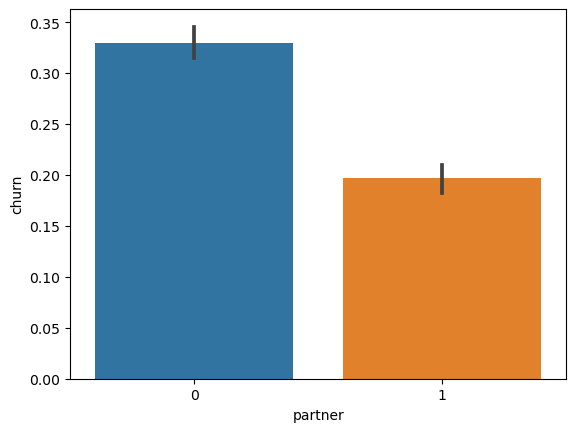

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature dependents:


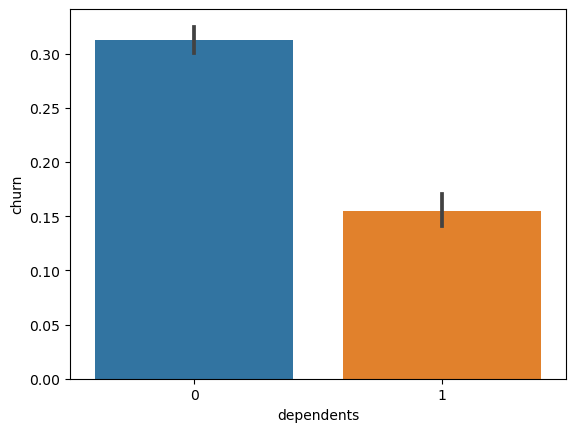

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature phone_service:


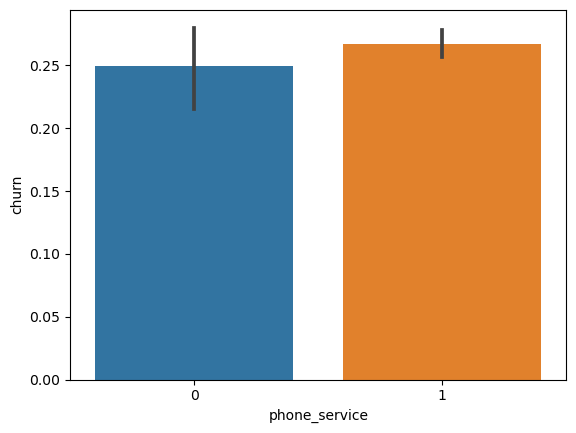

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature multiple_lines:


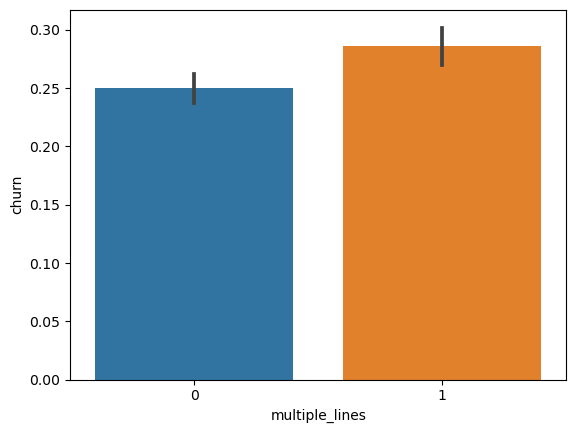

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature online_security:


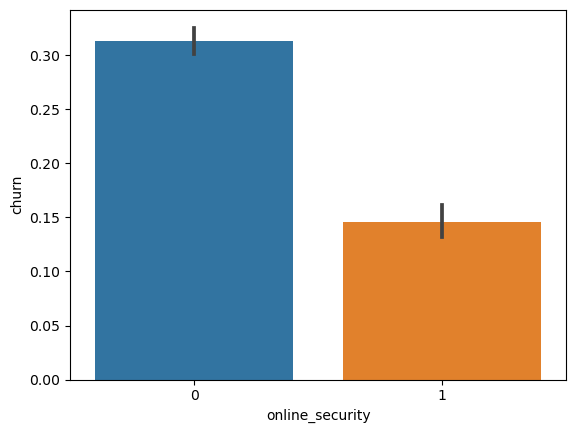

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature online_backup:


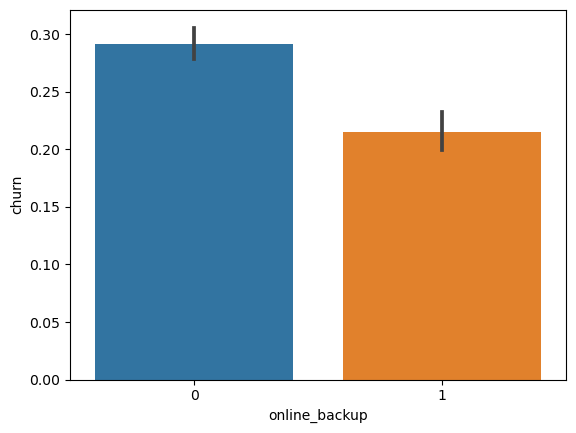

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature device_protection:


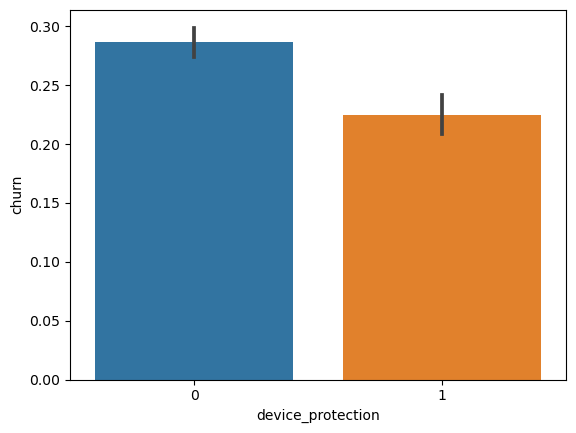

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature tech_support:


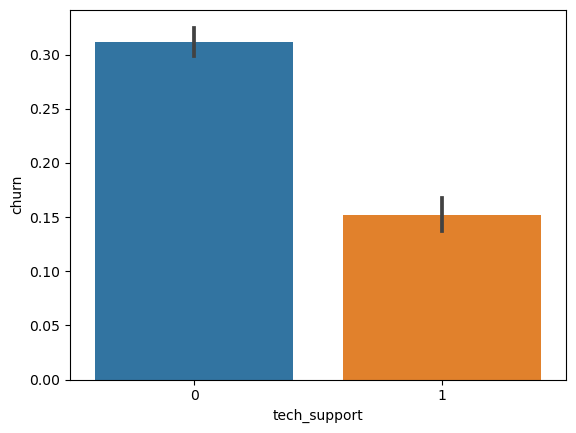

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature streaming_tv:


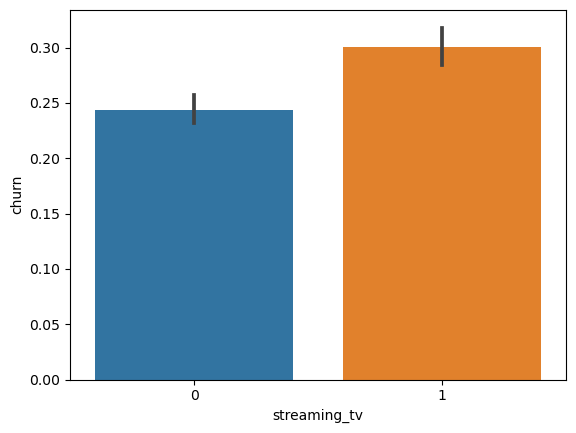

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature streaming_movies:


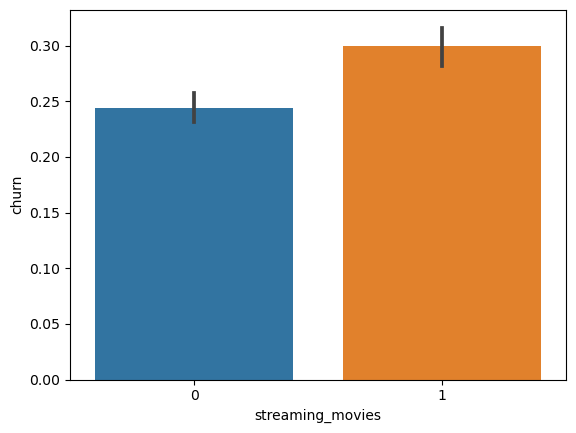

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature paperless_billing:


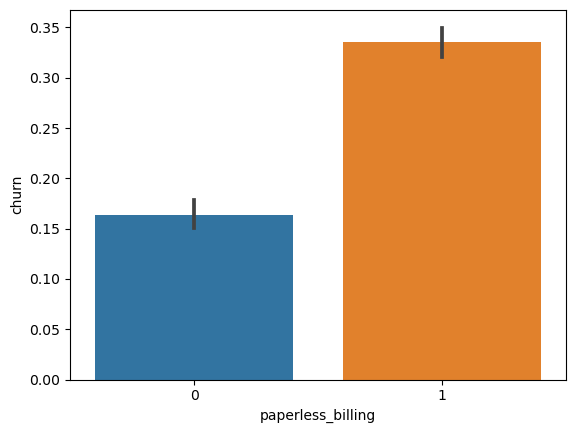

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature churn:


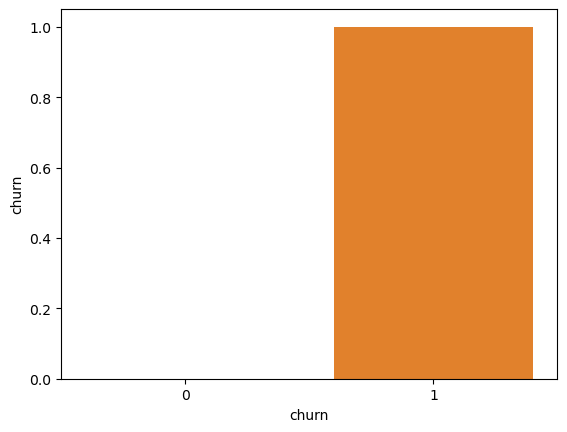

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature contract_type:


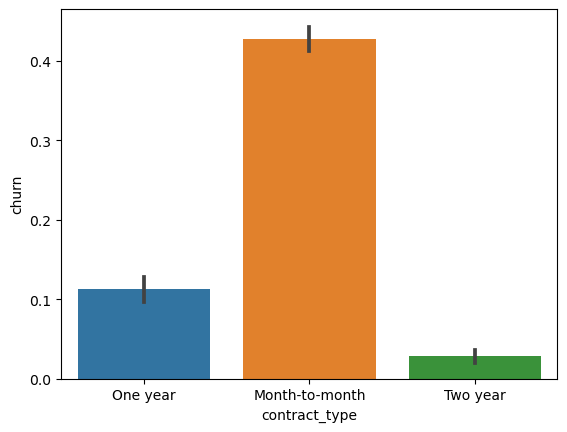

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature internet_service_type:


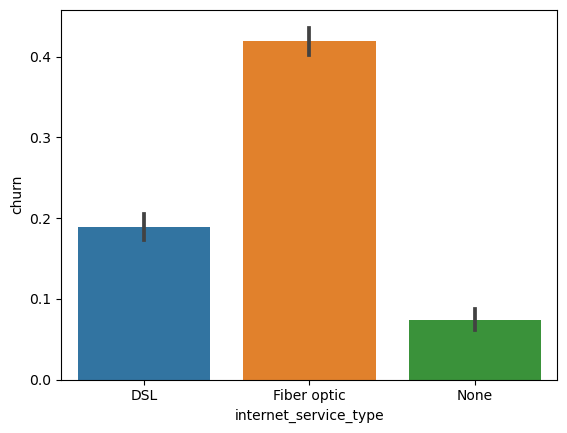

_____________________________________________________
_____________________________________________________

Bivariate assessment of feature payment_type:


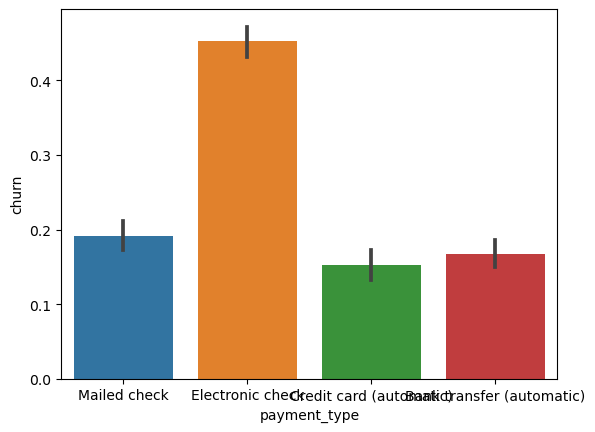

_____________________________________________________
_____________________________________________________

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature customer_id: 


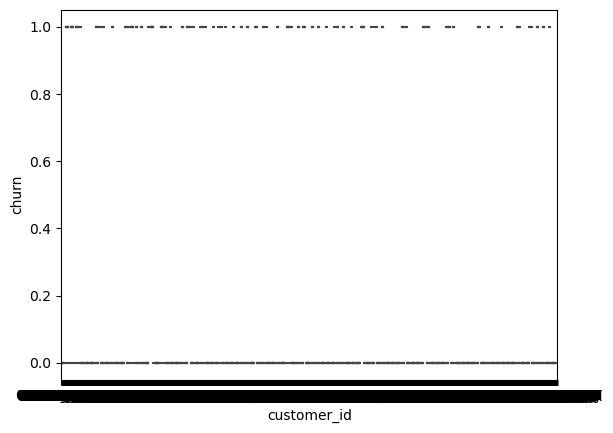

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature tenure: 


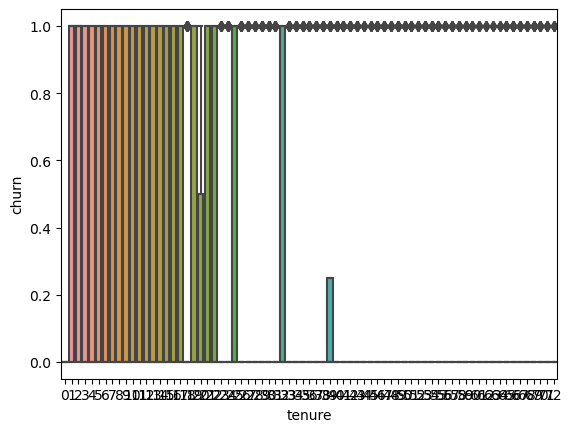

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature monthly_charges: 


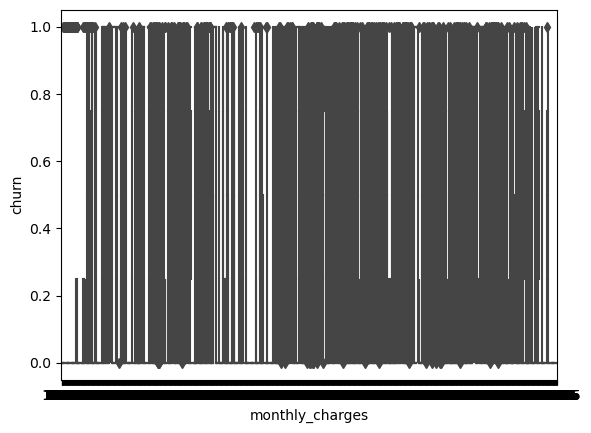

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature total_charges: 


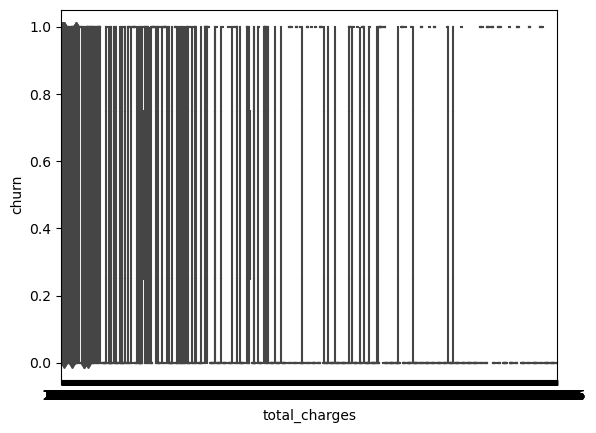

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature signup_date: 


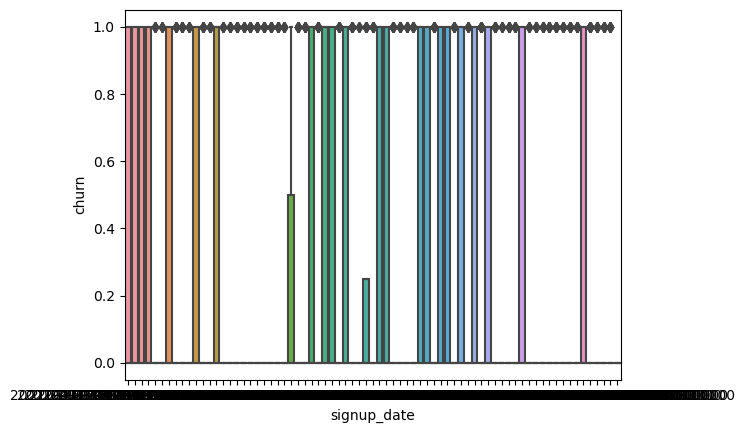

_____________________________________________________
_____________________________________________________

Bivariate feature analysis of feature time_with_telco: 


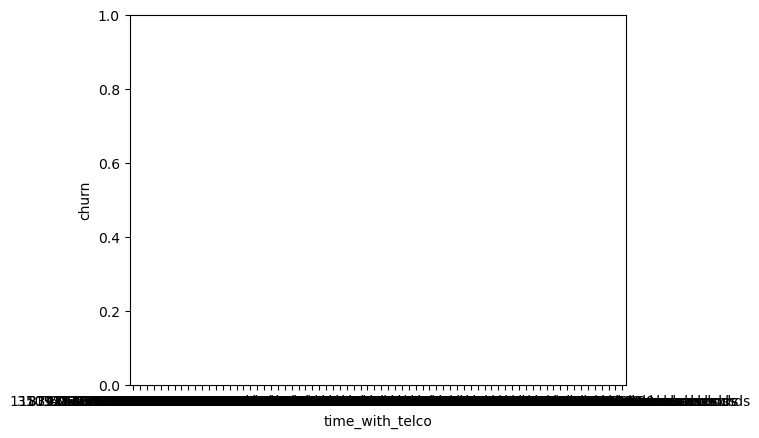

_____________________________________________________
_____________________________________________________



In [39]:
for col in explore_cols:
    if col in cat_cols:
        if col != 'churn_month':
            print(f'Bivariate assessment of feature {col}:')
            sns.barplot(data = ct, x = col, y = 'churn')
            plt.show()
      
    else:
        print(f'Bivariate feature analysis of feature {col}: ')
        sns.boxplot(data = ct, x = col, y = 'churn')
        plt.show()
    print('_____________________________________________________')
    print('_____________________________________________________')
    print()

- gender:
    no siginificant difference in the churn rate between men and women
- senior citizen**:
    of senior citizens, more churn than not by about half
- partner: more people who not partners churn vs those who are
- dependents: more people who have dependents stay with the company than those with without
- phone service: no notable differnence in the churn rate between those who have phone service and those who do not
- multiple lines: no notable differnence in the churn rate between those who have multiple lines and those who do not
- online security: notably more people who do not have online security churn than those who do
- online backup: a little more of those without online backup churn
- device protection: a little more of those without device protection churn 
- tech support: more people who do not have tech support churn than those who do not
- streaming tv: more people who pay for tv streaming churn than those who do not**
- streaming movies: more people who who pay to stream movies churn than those who do not**
- paperless billing: moer people who use paperless billing churn than those who do not
- contract type:
     - far more people who are month to month churn
- internet service type: 
    - far more people who have fiber optic churn 
- payment type: 
    - most people who churn pay by electronic check, but the distribution mirrirs that of the actual distribution

In [40]:
(ct.churn_month.isna().sum()) + ((ct.churn == 1).sum())
# so the total of those who have a churn month equals those who we are tracking have churned
# so all of the NaN values in the churn_month series we can conclude are still with 
# the company

1869

Now that we have plotted our variables, lets ask our four questions:
1. Is there a relationship between customers who are senior citizens those who are not?
2. Is the mean total charges of those who pay for internet, phone, and streaming services more than those who do not?
3. Do those who pay for internet, phone, and streaming services have greater tenures than those who do not?
4. Is there a relationship between customers who have dependents and churn?

In [41]:
# Lets do some hypothesis testing!

Questions 1: Is there a relationship between being a senior citizen and churning?

Being a senior citizen and churning are two categorical variables so we will conduct a Chi Squared test. 

In [42]:
observed = pd.crosstab(ct['senior_citizen'], ct['churn'])
observed

churn,0,1
senior_citizen,,
0,4508,1393
1,666,476


$H_0$: Churn and being a senior citizen are independent of each other.

$H_A$: Churn and being a senior citizen are dependent pn each other.

In [43]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [44]:
# We will set our CLI at 95% so our alpha will be set at 5%
α = 0.05

In [45]:
if p < α:
    print(f'The p value ({p}) is less than our alpha so we reject the null hypothesis, and we cannot with confidence conclude that churn and being a senior citizen are independent of eachother.')
else:
    print(f'The p value ({p} is greater than or equal to the alpha, and therefore we fail to reject the null hypothesis and can say with confident that churn and being a senior citizen are independent variables.')

The p value (1.510066805092378e-36) is less than our alpha so we reject the null hypothesis, and we cannot with confidence conclude that churn and being a senior citizen are independent of eachother.


The p value is quite small so there we can conclude with confidcent that being a senior citizen is a strong indicator a customer will churn.

Question 2: Is the mean total charges of those who pay for internet, phone, and streaming services more than those who do not?

Wel will do a mean comparison of the total charges between two sample groups. We are looking to see if the mean for with services is greater than those without.

Two samples, one tailed

In [46]:
all_services = filtered_ct[(filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1)]
all_services

,internet_service_type,phone_service,streaming_tv,streaming_movies,churn,monthly_charges,tenure,total_charges
3,Fiber optic,1,1,1,1,98.00,13,1237.85
5,DSL,1,1,1,0,69.40,9,571.45
6,Fiber optic,1,1,1,0,109.70,71,7904.25
9,DSL,1,1,1,0,90.45,65,5957.90
11,Fiber optic,1,1,1,0,116.80,72,8456.75
...,...,...,...,...,...,...,...,...
7019,Fiber optic,1,1,1,0,106.70,71,7382.25
7020,Fiber optic,1,1,1,1,96.80,21,2030.30
7027,Fiber optic,1,1,1,0,108.90,34,3625.20
7031,Fiber optic,1,1,1,0,99.15,64,6171.20


okay so there are no customers who do not pay for any of the services. To zoom in more, lets just look at streaming services. 

In [47]:
not_all_services = filtered_ct[~((filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1))]
all_services = filtered_ct[(filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1)]

In [48]:
filtered_ct[~((filtered_ct['phone_service'] == 1) & ((filtered_ct['internet_service_type'] == 'DSL') | (filtered_ct['internet_service_type'] == 'Fiber optic')) & (filtered_ct['streaming_tv'] == 1) & (filtered_ct['streaming_movies'] == 1))]

,internet_service_type,phone_service,streaming_tv,streaming_movies,churn,monthly_charges,tenure,total_charges
0,DSL,1,1,0,0,65.60,9,593.30
1,DSL,1,0,1,0,59.90,9,542.40
2,Fiber optic,1,0,0,1,73.90,4,280.85
4,Fiber optic,1,1,0,1,83.90,3,267.40
7,Fiber optic,1,0,0,0,84.65,63,5377.80
...,...,...,...,...,...,...,...,...
7038,DSL,1,0,0,0,55.15,13,742.90
7039,Fiber optic,1,0,1,1,85.10,22,1873.70
7040,DSL,1,0,0,0,50.30,2,92.75
7041,DSL,1,0,1,0,67.85,67,4627.65


In [49]:
not_all_charges = not_all_services.total_charges 
all_charges = all_services.total_charges

$H_O$: The mean of total charges of those who pay for all services is less or equal to the mean of total charges of those who do not. 

$H_A$: The mean of total charges of those who pay for all services is greater than the mean of total charges of those who do not. 

In [50]:
# Lets check for variance!

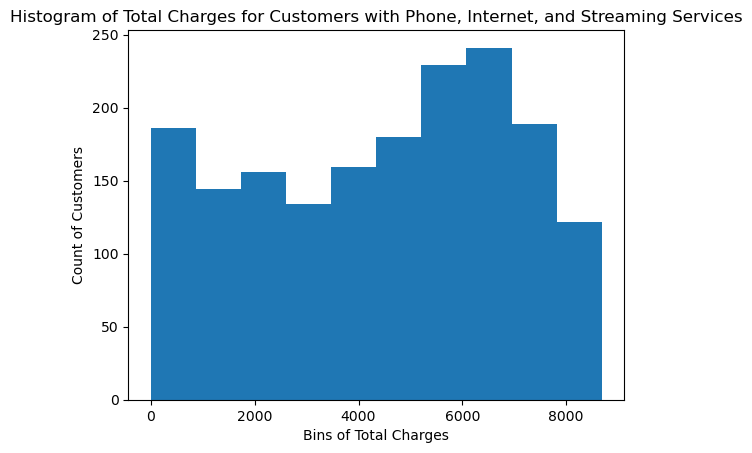

In [51]:
plt.hist(all_charges)
plt.title('Histogram of Total Charges for Customers with Phone, Internet, and Streaming Services')
plt.xlabel('Bins of Total Charges')
plt.ylabel('Count of Customers')
plt.show()

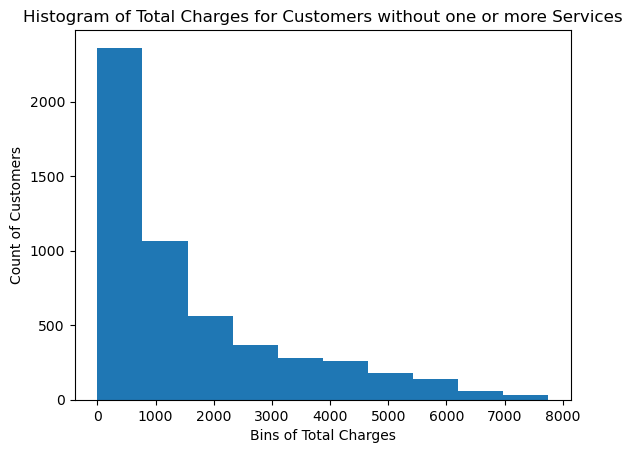

In [52]:
plt.hist(not_all_charges)
plt.title('Histogram of Total Charges for Customers without one or more Services')
plt.xlabel('Bins of Total Charges')
plt.ylabel('Count of Customers')
plt.show()

$H_O$: Total charges for both samples have equal variance.

$H_A$: Total charges for both samples do NOT have equal variance.

In [53]:
t_stat, p_val = stats.levene(not_all_charges, all_charges)

In [54]:
if p_val < α:
    print(f'With a p value of {p_val}, we must reject the null hypothesis; we cannot presume that these samples have equal variance.')
else:
        print(f'With a p value of {p_val}, we fail to reject the null hypothesis; we can presume that these samples have equal variance.')

With a p value of 2.754935227098051e-124, we must reject the null hypothesis; we cannot presume that these samples have equal variance.


The two samples have inequal variance and therefore we cannot conduct the means comaprison. 

Question 3: Do those who pay for internet, phone, and streaming services have greater tenures than those who do not?

Two independent samples, mean comparison testing, one tailed

In [55]:
not_all_tenure = not_all_services.tenure
all_tenure = all_services.tenure

Lets set out hypotheses:

$H_O$: The mean of tenure of those who pay for all services is more than or equal to the mean of total charges of those who do not. 

$H_A$: The mean of total charges of those who pay for all services is less than the mean of total charges of those who do not. 

Lets check for variance!

$H_O$: Tenure for both samples have equal variance.

$H_A$: Tenure for both samples do NOT have equal variance.

In [56]:
t_stat, p_val = stats.levene(not_all_tenure, all_tenure)

In [57]:
if p_val < α:
    print(f'With a p value of {p_val}, we must reject the null hypothesis; we cannot presume that these samples have equal variance.')
else:
    print(f'With a p value of {p_val}, we fail to reject the null hypothesis; we can presume that these samples have equal variance.')

With a p value of 0.20602411457054742, we fail to reject the null hypothesis; we can presume that these samples have equal variance.


Great so our samples have equal variance and now we can move on to our testing.

In [58]:
t_stat, p = stats.ttest_ind(not_all_tenure, all_tenure, equal_var=True)

In [59]:
if (p / 2 < α) and (t_stat < 0):
    print(f'With a p value of {p} and a t_statistic of {t_stat} which is less than 0, we must reject the null hypothesis; we cannot presume that the tenure of those who pay for all services is greater than or equal the tenure of those who do not pay for all services.')
else:
    print(f'With a p value of {p_val}, we fail to reject the null hypothesis; we can presume that these samples have equal variance.')

With a p value of 4.946213374299674e-137 and a t_statistic of -25.476763548310927 which is less than 0, we must reject the null hypothesis; we cannot presume that the tenure of those who pay for all services is greater than or equal the tenure of those who do not pay for all services.


Conclusion: we can presume that the tenure of those who pay for all services is lower than those do not, so those with all services tend to stay with the company for less time than those who do not pay for all services. 

In [60]:
ct.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [61]:
print(len(ct[(ct.internet_service_type == 'DSL') & (ct.churn == 1)]))
len(ct[ct.internet_service_type == 'DSL'])
# So of those with DSL, 459 out of 2421 churned

459


2421

In [62]:
print(len(ct[(ct.internet_service_type == 'Fiber optic') & (ct.churn == 1)]))
len(ct[ct.internet_service_type == 'Fiber optic'])
# And of those with Fiber Optic, 1297 out of 3096 churned

1297


3096

In [63]:
print(len(ct[(ct.streaming_tv == 1) & (ct.churn == 1)]))
len(ct[ct.churn == 1])

814


1869

In [64]:
print(len(ct[(ct.streaming_movies == 1) & (ct.churn == 1)]))
len(ct[ct.churn == 1])

818


1869

Question 4: Is there a relationship between customers who have dependents and churn?

Two categorical samples, so we will conduct a chi squared test

In [65]:
ct_dependents = ct[['dependents', 'churn']]

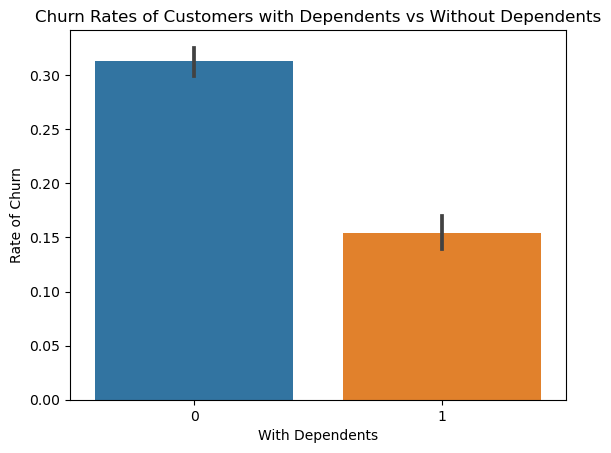

In [66]:
sns.barplot(data=ct_dependents, x='dependents', y='churn')
plt.title('Churn Rates of Customers with Dependents vs Without Dependents')
plt.xlabel('With Dependents')
plt.ylabel('Rate of Churn')
plt.show()

In [67]:
observed = pd.crosstab(ct.dependents, ct.churn)
observed

churn,0,1
dependents,,
0,3390,1543
1,1784,326


$H_O$: The variables with dependents and churn are independent of each other. 

$H_A$: The variables with dependents and churn are dependent upon each other. 

In [68]:
chi2, p, _, expected = stats.chi2_contingency(observed)

In [69]:
if p < α:
    print(f'The p value ({p}) is less than our alpha so we reject the null hypothesis, and we cannot with confidence conclude that churn and having dependents are independent of eachother.')
else:
    print(f'The p value ({p} is greater than or equal to the alpha, and therefore we fail to reject the null hypothesis and can say with confident that churn and having dependents are independent variables.')

The p value (4.9249216612154196e-43) is less than our alpha so we reject the null hypothesis, and we cannot with confidence conclude that churn and having dependents are independent of eachother.


Conclusion: So we can presume that having dependents is indicative whether or not a customer will churn. It seems like if a customer has dependents, they are more likely to NOT churn. 

# MODELING

In [70]:
modeling_ct = ct.drop(columns=(['signup_date', 'time_with_telco', 'gender', 'contract_type', 'internet_service_type', 'payment_type', 'churn_month']))
modeling_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   senior_citizen                        7043 non-null   int64  
 2   partner                               7043 non-null   int64  
 3   dependents                            7043 non-null   int64  
 4   tenure                                7043 non-null   int64  
 5   phone_service                         7043 non-null   int64  
 6   multiple_lines                        7043 non-null   int64  
 7   online_security                       7043 non-null   int64  
 8   online_backup                         7043 non-null   int64  
 9   device_protection                     7043 non-null   int64  
 10  tech_support                          7043 non-null   int64  
 11  streaming_tv     

### Baseline

Im going to create my baseline model now, so Im going to see which of the outcomes for churn is the mode and then use that as my baseline outcome.

In [71]:
modeling_ct.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'gender_Male', 'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check'],
      dtype='object')

In [72]:
modeling_ct.churn.value_counts()
# Looks like staying with the company is the mode, baseline = 0

0    5174
1    1869
Name: churn, dtype: int64

In [73]:
modeling_ct['baseline'] = 0

I will call my split_data function from my prepare.py file as we are gearing up to start modeling.

In [74]:
train, test, validate = prepare.split_data(modeling_ct, 'churn')

(7043, 26)
(5634, 26)
(1409, 26)


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
baseline_accuracy = accuracy_score(modeling_ct.churn, modeling_ct.baseline)
baseline_accuracy

0.7346301292063041

In [77]:
# now we will make variables that will spearate our features from our target on our
# datasets

In [78]:
# sns.pairplot(train, hue='churn', corner=True)
# plt.show()

In [79]:
X_cols = train.columns.to_list()
y_cols = 'churn'

In [80]:
# Then we will take the target column out of the features list
X_cols.remove('churn')
X_cols.remove('customer_id')

In [81]:
X_cols

['senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'baseline']

In [82]:
# now lets sparse our datasets with the correct columns

X_train = train[X_cols]
y_train = train[y_cols]
X_val = validate[X_cols]
y_val = validate[y_cols]
X_test = test[X_cols]
y_test = test[y_cols]

### Logistic Regression Models

My first model is going to be a logistic regression as we are dealing with a binary target.

In [83]:
# make the thing
lr1 = LogisticRegression()

# fit the thing
lr1.fit(X_train, y_train)

# use the thing
lr1.score(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8201876743596247

From our exploration, in our bivariate graphing we concluded that senior citizenship, partner, dependents, online security, tech support, streaming tv, streaming movies, paperless billing, contract type, internet service type, and payment type all showed different distributions when compared to churn. Lets make a subset with those features and see how it compares. 

In [84]:
subset = ['senior_citizen', 'partner', 'dependents', 'online_security', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check']

In [85]:
lr2 = LogisticRegression()
lr2.fit(X_train[subset], y_train)
lr2.score(X_train[subset], y_train)

0.7945726604108547

HMM Seems like using the selected columns lowered the accuracy.

During our hypothesis testing, we concluded that dependents, total charges, and tenure are all dependent on churn, so lets make a model with only those features.

In [86]:
dependent_subset = ['dependents', 'total_charges', 'tenure']

In [87]:
lr3 = LogisticRegression()
lr3.fit(X_train[dependent_subset], y_train)
lr3.score(X_train[dependent_subset], y_train)

0.7722546284554908

HMMM Seems that these features do even worse on the train target set.

### Decision Tree Models

In [88]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [89]:
# Make the thing
dt1 = DecisionTreeClassifier()
# fit the thing
dt1.fit(X_train, y_train)

# Score the thing
dt1.score(X_train, y_train)
# wow look at it go with no max_depth!

0.9982247020035506

In [90]:
# lets add a max depth 

model_dict = {}
model = {}

for i in range(2, 15):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(train[X_cols], train[y_cols])
    model_dict[f'dt_depth_{i}'] = {}
    model_dict[f'dt_depth_{i}']['model'] = clf
    model_dict[f'dt_depth_{i}']['train_score'] = \
    clf.score(train[X_cols], train[y_cols])
    model_dict[f'dt_depth_{i}']['validate_score'] = \
    clf.score(X_val, y_val)
    model_dict[f'dt_depth_{i}']['val_diff'] = \
    clf.score(train[X_cols], train[y_cols]) - clf.score(X_val, y_val)

In [91]:
pd.DataFrame(model_dict).T

,model,train_score,validate_score,val_diff
dt_depth_2,DecisionTreeClassifier(max_depth=2),0.801674,0.782377,0.019297
dt_depth_3,DecisionTreeClassifier(max_depth=3),0.801674,0.782377,0.019297
dt_depth_4,DecisionTreeClassifier(max_depth=4),0.807,0.780603,0.026397
dt_depth_5,DecisionTreeClassifier(max_depth=5),0.820441,0.780603,0.039838
dt_depth_6,DecisionTreeClassifier(max_depth=6),0.827289,0.776464,0.050825
dt_depth_7,DecisionTreeClassifier(max_depth=7),0.841998,0.774098,0.0679
dt_depth_8,DecisionTreeClassifier(max_depth=8),0.85823,0.762271,0.095959
dt_depth_9,DecisionTreeClassifier(max_depth=9),0.880548,0.760497,0.120051
dt_depth_10,DecisionTreeClassifier(max_depth=10),0.902359,0.751626,0.150732
dt_depth_11,DecisionTreeClassifier(max_depth=11),0.924677,0.749261,0.175416


In [92]:
# Looks like our best Decision Tree Models are dt_depth_2 
# and dt_depth_3!

### Random Forest Models

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [94]:
# Make the things 

rf_models = {}

for i in [pair for pair in zip (range(1, 10), range(10, 1, -1))]:
    # make the things
    clf = RandomForestClassifier(min_samples_leaf=i[0],
                                max_depth=i[1])
    # fit the things
    clf.fit(X_train, y_train)
    #Before we can use the things, we have to name and store the things 
    #to be able to call them
    rf_models[f'{clf}{i}_model'] = {
        'model': clf,
        'train_score': round(clf.score(X_train, y_train), 5),
        'validate_score': round(clf.score(X_val, y_val), 5),
        'val_diff': round(clf.score(X_train, y_train), 5) - round(clf.score(X_val, y_val), 5)
    
    }

In [95]:
pd.DataFrame(rf_models).T

,model,train_score,validate_score,val_diff
"RandomForestClassifier(max_depth=10)(1, 10)_model","(DecisionTreeClassifier(max_depth=10, max_features='sqrt',\n ran...",0.89272,0.78888,0.10384
"RandomForestClassifier(max_depth=9, min_samples_leaf=2)(2, 9)_model","(DecisionTreeClassifier(max_depth=9, max_features='sqrt', min_samples_leaf=2,\n ...",0.86482,0.78829,0.07653
"RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model","(DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=3,\n ...",0.84479,0.79066,0.05413
"RandomForestClassifier(max_depth=7, min_samples_leaf=4)(4, 7)_model","(DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=4,\n ...",0.83185,0.78829,0.04356
"RandomForestClassifier(max_depth=6, min_samples_leaf=5)(5, 6)_model","(DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=5,\n ...",0.82526,0.78415,0.04111
"RandomForestClassifier(max_depth=5, min_samples_leaf=6)(6, 5)_model","(DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=6,\n ...",0.81359,0.78474,0.02885
"RandomForestClassifier(max_depth=4, min_samples_leaf=7)(7, 4)_model","(DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=7,\n ...",0.80827,0.7806,0.02767
"RandomForestClassifier(max_depth=3, min_samples_leaf=8)(8, 3)_model","(DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=8,\n ...",0.79762,0.7741,0.02352
"RandomForestClassifier(max_depth=2, min_samples_leaf=9)(9, 2)_model","(DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=9,\n ...",0.76921,0.7605,0.00871


Of our Random Forest models, it looks like the best performers are model max_depth = 9 and min_samples_leaf=2 and model max_depth=8 and min_samples_leaf= 3. 

####  Models to be further evaluated:

    From the Random Forest:
    
        - RandomForestClassifier(max_depth=8, min_samples_leaf=3)(3, 8)_model
    
    From the Decision Tree:
        - DecisionTreeClassifier(max_depth=3)	
    
    From Logistic Regression: 
        - lr1

In [96]:
rf3_8 = RandomForestClassifier()
rf3_8.fit(X_train, y_train)

dt3 = DecisionTreeClassifier()
dt3.fit(X_train, y_train)

lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
import evaluation

Now we will do some evaluations based on our test set!

#### rf3_8

In [98]:
# Calculating y predictions based off of the train dataset
rf3_8_train_preds = rf3_8.predict(X_train)

In [99]:
# Evaluation metrics for rf3_8 on train set
evaluation.get_metrics(y_train, rf3_8_train_preds, train)


    Accuracy: 0.9979710880040579
    True Positive Rate: 0.9989637305699481
    True Negative Rate: 0.9952290076335878
    False Positive Rate: 0.004770992366412214
    False Negative Rate: 0.0010362694300518134
    Precision : 0.9982740766309975
    f1 score: 0.9986187845303867
    supports: 0: 2897 1: 1046
    


In [100]:
# confusion report for rf3_8 on train set
evaluation.conf_matrix(y_train, rf3_8_train_preds)

,pred_0,pred_1
actual_0,True Positive: 2892,False Positive: 5
actual_1,False Positive: 3,True Negative: 1043


In [101]:
# classification report for rf3_8 on train set
evaluation.class_report(y_train, rf3_8_train_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.998964,0.995229,0.997971,0.997096,0.997973
recall,0.998274,0.997132,0.997971,0.997703,0.997971
f1-score,0.998619,0.996180,0.997971,0.997399,0.997972
support,2897.000000,1046.000000,0.997971,3943.000000,3943.000000


In [102]:
# Calculating y preds based off of the validate dataset

In [103]:
rf3_8_val_preds = rf3_8.predict(X_val)

In [104]:
# Evaluation metrics for rf3_8 on validate set
evaluation.get_metrics(y_val, rf3_8_val_preds, validate)


    Accuracy: 0.7764636309875813
    True Positive Rate: 0.82
    True Negative Rate: 0.6041055718475073
    False Positive Rate: 0.39589442815249265
    False Negative Rate: 0.18
    Precision : 0.8913043478260869
    f1 score: 0.8541666666666666
    supports: 0: 1242 1: 449
    


In [105]:
# confusion report for rf3_8 on validate set
evaluation.conf_matrix(y_val, rf3_8_val_preds)

,pred_0,pred_1
actual_0,True Positive: 1107,False Positive: 135
actual_1,False Positive: 243,True Negative: 206


In [106]:
confusion_matrix(y_val, rf3_8_val_preds)

array([[1107,  135],
       [ 243,  206]])

In [107]:
(y_val == rf3_8_val_preds).sum()

1313

In [108]:
# classification report for rf3_8 on validate set
evaluation.class_report(y_val, rf3_8_val_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.820000,0.604106,0.776464,0.712053,0.762675
recall,0.891304,0.458797,0.776464,0.675051,0.776464
f1-score,0.854167,0.521519,0.776464,0.687843,0.765841
support,1242.000000,449.000000,0.776464,1691.000000,1691.000000


### dt3

In [109]:
dt3_train_preds = dt3.predict(X_train)

In [110]:
# Evaluation metrics for rt3 on train dataset
evaluation.get_metrics(y_train, dt3_train_preds, train)


    Accuracy: 0.9982247020035506
    True Positive Rate: 0.9975895316804407
    True Negative Rate: 1.0
    False Positive Rate: 0.0
    False Negative Rate: 0.0024104683195592287
    Precision : 1.0
    f1 score: 0.9987933114980176
    supports: 0: 2897 1: 1046
    


In [111]:
# Confusion matrix for rt3 on train dataset
evaluation.conf_matrix(y_train, dt3_train_preds)

,pred_0,pred_1
actual_0,True Positive: 2897,False Positive: 0
actual_1,False Positive: 7,True Negative: 1039


In [112]:
# Classification report for rt3 
evaluation.class_report(y_train, dt3_train_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.997590,1.000000,0.998225,0.998795,0.998229
recall,1.000000,0.993308,0.998225,0.996654,0.998225
f1-score,0.998793,0.996643,0.998225,0.997718,0.998223
support,2897.000000,1046.000000,0.998225,3943.000000,3943.000000


In [113]:
# Calculating predictions on the validate dataset
dt3_val_preds = dt3.predict(X_val)

In [114]:
# Evaluation metrics for rt3
evaluation.get_metrics(y_val, dt3_val_preds, validate)


    Accuracy: 0.7273802483737434
    True Positive Rate: 0.8235294117647058
    True Negative Rate: 0.48760330578512395
    False Positive Rate: 0.512396694214876
    False Negative Rate: 0.17647058823529413
    Precision : 0.8003220611916264
    f1 score: 0.8117599020008167
    supports: 0: 1242 1: 449
    


In [115]:
# Confustion matrix for rt3 validation predictions
evaluation.conf_matrix(y_val, dt3_val_preds)

,pred_0,pred_1
actual_0,True Positive: 994,False Positive: 248
actual_1,False Positive: 213,True Negative: 236


In [116]:
# Classification report for rt3 validation predictions
evaluation.class_report(y_val, dt3_val_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.823529,0.487603,0.72738,0.655566,0.734333
recall,0.800322,0.525612,0.72738,0.662967,0.727380
f1-score,0.811760,0.505895,0.72738,0.658827,0.730546
support,1242.000000,449.000000,0.72738,1691.000000,1691.000000


### lr1

In [117]:
lr1_train_preds = lr1.predict(X_train)

In [118]:
evaluation.get_metrics(y_train, lr1_train_preds, train)


    Accuracy: 0.8201876743596247
    True Positive Rate: 0.859395532194481
    True Negative Rate: 0.6874304783092324
    False Positive Rate: 0.3125695216907675
    False Negative Rate: 0.14060446780551905
    Precision : 0.9030031066620642
    f1 score: 0.8806598215788588
    supports: 0: 2897 1: 1046
    


In [119]:
evaluation.conf_matrix(y_train, lr1_train_preds)

,pred_0,pred_1
actual_0,True Positive: 2616,False Positive: 281
actual_1,False Positive: 428,True Negative: 618


In [120]:
evaluation.class_report(y_train, lr1_train_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.859396,0.687430,0.820188,0.773413,0.813777
recall,0.903003,0.590822,0.820188,0.746913,0.820188
f1-score,0.880660,0.635476,0.820188,0.758068,0.815617
support,2897.000000,1046.000000,0.820188,3943.000000,3943.000000


In [121]:
lr1_val_preds = lr1.predict(X_val)

In [122]:
evaluation.get_metrics(y_val, lr1_val_preds, validate)


    Accuracy: 0.7894736842105263
    True Positive Rate: 0.8361153262518968
    True Negative Rate: 0.6246648793565683
    False Positive Rate: 0.3753351206434316
    False Negative Rate: 0.1638846737481032
    Precision : 0.8872785829307569
    f1 score: 0.8609374999999999
    supports: 0: 1242 1: 449
    


In [123]:
evaluation.conf_matrix(y_val, lr1_val_preds)

,pred_0,pred_1
actual_0,True Positive: 1102,False Positive: 140
actual_1,False Positive: 216,True Negative: 233


In [124]:
evaluation.class_report(y_val, lr1_val_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.836115,0.624665,0.789474,0.730390,0.779970
recall,0.887279,0.518931,0.789474,0.703105,0.789474
f1-score,0.860937,0.566910,0.789474,0.713924,0.782866
support,1242.000000,449.000000,0.789474,1691.000000,1691.000000


For this particular question of trying to predict churn, I think the evaluation metric of F1 score.

In [125]:
print()
print('        Evaluation Metrics on the Train Dataset')
print('_____________________________________________________________')
print()
print('    Random Forest Model, max_depth=8, min_samples_leaf=3:')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_train, rf3_8_train_preds, train))
print('_____________________________________________________________')
print('_____________________________________________________________')
print()
print('                 Decision Tree , max_depth=3')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_train, dt3_train_preds, train))
print('_____________________________________________________________')
print('_____________________________________________________________')
print()
print('                  Logistic Regression Model')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_train, lr1_train_preds, train))


        Evaluation Metrics on the Train Dataset
_____________________________________________________________

    Random Forest Model, max_depth=8, min_samples_leaf=3:
_____________________________________________________________

    Accuracy: 0.9979710880040579
    True Positive Rate: 0.9989637305699481
    True Negative Rate: 0.9952290076335878
    False Positive Rate: 0.004770992366412214
    False Negative Rate: 0.0010362694300518134
    Precision : 0.9982740766309975
    f1 score: 0.9986187845303867
    supports: 0: 2897 1: 1046
    
None
_____________________________________________________________
_____________________________________________________________

                 Decision Tree , max_depth=3
_____________________________________________________________

    Accuracy: 0.9982247020035506
    True Positive Rate: 0.9975895316804407
    True Negative Rate: 1.0
    False Positive Rate: 0.0
    False Negative Rate: 0.0024104683195592287
    Precision : 1.0
    f1 score: 

In [126]:
print()
print('        Evaluation Metrics on the Validate Dataset')
print('_____________________________________________________________')
print()
print('    Random Forest Model, max_depth=8, min_samples_leaf=3:')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_val, rf3_8_val_preds, validate))
print('_____________________________________________________________')
print('_____________________________________________________________')
print()
print('                 Decision Tree , max_depth=3')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_val, dt3_val_preds, validate))
print('_____________________________________________________________')
print('_____________________________________________________________')
print()
print('                  Logistic Regression Model')
print('_____________________________________________________________')
print(evaluation.get_metrics(y_val, lr1_val_preds, validate))


        Evaluation Metrics on the Validate Dataset
_____________________________________________________________

    Random Forest Model, max_depth=8, min_samples_leaf=3:
_____________________________________________________________

    Accuracy: 0.7764636309875813
    True Positive Rate: 0.82
    True Negative Rate: 0.6041055718475073
    False Positive Rate: 0.39589442815249265
    False Negative Rate: 0.18
    Precision : 0.8913043478260869
    f1 score: 0.8541666666666666
    supports: 0: 1242 1: 449
    
None
_____________________________________________________________
_____________________________________________________________

                 Decision Tree , max_depth=3
_____________________________________________________________

    Accuracy: 0.7273802483737434
    True Positive Rate: 0.8235294117647058
    True Negative Rate: 0.48760330578512395
    False Positive Rate: 0.512396694214876
    False Negative Rate: 0.17647058823529413
    Precision : 0.8003220611916264
 

#### NOW WE TEST ON OUR LOGISTIC REGRESSION MODEL :)

In [127]:
rf3_8_test_preds = rf3_8.predict(X_test)

In [128]:
evaluation.get_metrics(y_test, rf3_8_test_preds, test)


    Accuracy: 0.7700496806245565
    True Positive Rate: 0.827046918123275
    True Negative Rate: 0.577639751552795
    False Positive Rate: 0.422360248447205
    False Negative Rate: 0.17295308187672492
    Precision : 0.8685990338164251
    f1 score: 0.8473138548539113
    supports: 0: 1035 1: 374
    


In [129]:
evaluation.conf_matrix(y_test, rf3_8_test_preds)

,pred_0,pred_1
actual_0,True Positive: 899,False Positive: 136
actual_1,False Positive: 188,True Negative: 186


In [130]:
evaluation.class_report(y_test, rf3_8_test_preds)

,0,1,accuracy,macro avg,weighted avg
precision,0.827047,0.577640,0.77005,0.702343,0.760845
recall,0.868599,0.497326,0.77005,0.682963,0.770050
f1-score,0.847314,0.534483,0.77005,0.690898,0.764277
support,1035.000000,374.000000,0.77005,1409.000000,1409.000000


In [131]:
account_nums = pd.DataFrame(ct['customer_id'])


In [132]:
y_test_df = pd.DataFrame(y_test)
y_test_df

,churn
1247,0
7011,0
2647,0
6149,0
5797,0
...,...
6534,0
2010,0
570,0
362,0


In [133]:
rf3_8_preds = pd.array(rf3_8_test_preds)
rf3_8_preds

<IntegerArray>
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
 ...
 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
Length: 1409, dtype: Int64

In [134]:
y_test_df['rf3_8_preds'] = rf3_8_preds
y_test_df

,churn,rf3_8_preds
1247,0,1
7011,0,0
2647,0,0
6149,0,0
5797,0,0
...,...,...
6534,0,0
2010,0,0
570,0,0
362,0,0


In [135]:
test.drop(columns=('churn'), inplace=True)

In [136]:
test.columns

Index(['customer_id', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'gender_Male',
       'contract_type_One year', 'contract_type_Two year',
       'internet_service_type_Fiber optic', 'internet_service_type_None',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'baseline'],
      dtype='object')

In [137]:
churn_predictions = pd.merge(y_test_df, test, left_index=True, right_index=True)

In [138]:
churn_predictions.columns.to_list()

['churn',
 'rf3_8_preds',
 'customer_id',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'baseline']

In [139]:
churn_predictions = churn_predictions.drop(columns=(['senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'gender_Male',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'baseline']))

In [140]:
churn_predictions

,churn,rf3_8_preds,customer_id
1247,0,1,1845-ZLLIG
7011,0,0,9945-PSVIP
2647,0,0,3761-FLYZI
6149,0,0,8711-LOBKY
5797,0,0,8164-OCKUJ
...,...,...,...
6534,0,0,9278-VZKCD
2010,0,0,2898-MRKPI
570,0,0,0839-QNXME
362,0,0,0531-ZZJWQ


In [141]:
churn_predictions = churn_predictions.loc[:,['customer_id', 'churn', 'rf3_8_preds']]

In [142]:
churn_predictions.churn.value_counts()

0    1035
1     374
Name: churn, dtype: int64

In [143]:
churn_predictions.rf3_8_preds.value_counts()

0    1087
1     322
Name: rf3_8_preds, dtype: Int64

In [144]:
pd.crosstab(churn_predictions.churn, churn_predictions.rf3_8_preds)

rf3_8_preds,0,1
churn,,
0,899,136
1,188,186


In [145]:
churn_predictions

,customer_id,churn,rf3_8_preds
1247,1845-ZLLIG,0,1
7011,9945-PSVIP,0,0
2647,3761-FLYZI,0,0
6149,8711-LOBKY,0,0
5797,8164-OCKUJ,0,0
...,...,...,...
6534,9278-VZKCD,0,0
2010,2898-MRKPI,0,0
570,0839-QNXME,0,0
362,0531-ZZJWQ,0,0


In [146]:
churn_predictions.to_csv('telco_churn_predictions.csv')

In [152]:
ct.groupby('dependents').agg('mean').T

dependents,0,1
senior_citizen,0.213055,0.043128
partner,0.335090,0.828910
tenure,29.806000,38.368246
phone_service,0.903507,0.902370
multiple_lines,0.429759,0.403318
online_security,0.262720,0.342654
online_backup,0.337523,0.362085
device_protection,0.339550,0.354028
tech_support,0.271437,0.334123
streaming_tv,0.389621,0.372038
